In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold
import requests
from requests import get
from bs4 import BeautifulSoup

import re

from time import sleep
from random import randint

In [153]:
Brand = []
Explanation = []
Body = []
Years = []
Kms = []
Prices = []
Hps = []
Gear = []
CO2_Emission = []
Consumption = []
Fuel = []


In [154]:
'''del(Brand)
del(Explanation)
del(Body)
del(Years)
del(Kms)
del(Prices)
del(Hps)
del(Gear)
del(CO2_Emission)
del(Consumption)
del(Fuel)

Brand = []
Explanation = []
Body = []
Years = []
Kms = []
Prices = []
Hps = []
Gear = []
CO2_Emission = []
Consumption = []
Fuel = []
'''

In [155]:
pages = np.arange(1,21,1)
pages

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [156]:
km_range = np.arange(20000,310000,10000)
km_range

array([ 20000,  30000,  40000,  50000,  60000,  70000,  80000,  90000,
       100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000,
       180000, 190000, 200000, 210000, 220000, 230000, 240000, 250000,
       260000, 270000, 280000, 290000, 300000])

In [157]:
# body:1 -> Compact
# body:5 -> Stationwagon
# body:6 -> Sedan
body_range = np.array([1,5,6])
body_range

array([1, 5, 6])

In [158]:
10*15*4*3*20

36000

In [159]:
env_range = np.arange(2,5,1)
env_range

array([2, 3, 4])

In [ ]:
https://www.autoscout24.com/lst/?sort=mileage&desc=0&custtype=P&ensticker=2&offer=J%2CU%2CO%2CD&ustate=N%2CU&size=20&page=1&pricefrom=500&kmto=20000&kmfrom=10001&body=1&atype=C&

In [160]:
link0 = 'https://www.autoscout24.com/lst/?sort=mileage&desc=0&custtype=P&ensticker='

for body_r in body_range:
    for env_r in env_range:
        for km_r in km_range:
            for page in pages:
                url = requests.get(str(link0)+str(env_r)+'&offer=J%2CU%2CO%2CD&ustate=N%2CU&size=20&page='+str(page)+'&pricefrom=500&kmto='+str(km_r)+'&kmfrom='+str(km_r-9999)+'&body='+str(body_r)+'&atype=C&')
                
                soup = BeautifulSoup(url.text, 'html.parser')
                car_div = soup.find_all('div', class_='cldt-summary-full-item-main')
    
                #sleep(randint(1,2))
                for cars in car_div:
    
                   
                    title = cars.div.a.div.find('h2', class_='cldt-summary-makemodel sc-font-bold sc-ellipsis').text
                    Brand.append(title)
                                        
                    year = cars.ul.find('li', attrs={'data-type':'first-registration'}).text
                    Years.append(year)
    
                    km = cars.ul.find('li', attrs={'data-type':'mileage'}).text
                    Kms.append(km)
    
                    hp = cars.ul.find('li', text=re.compile(r'kW')).text
                    Hps.append(hp)
    
                    price = cars.find('span', class_='cldt-price sc-font-xl sc-font-bold').text
                    Prices.append(price)
                    
                    body_type = body_r
                    Body.append(body_type)
                    
                    Co2_Em = cars.ul.find('li', attrs={'data-type':'co2-emission'}).text
                    CO2_Emission.append(Co2_Em)
                    
                    fuel_type = cars.ul.find('li', class_='summary_item_no_bottom_line').text
                    Fuel.append(fuel_type)
                    
                    cons = cars.ul.find('li', attrs={'data-type':'combined-consumption'}).text
                    Consumption.append(cons)
                    
                    gear_type = cars.ul.find('li', attrs={'data-type':'transmission-type'}).text
                    Gear.append(gear_type)


In [ ]:
len(Brand)

In [161]:
Used_Car = pd.DataFrame({
    'Brand': Brand,
    'Body_Type': Body,
    'Year': Years,
    'Power': Hps,
    'Gear_Type': Gear,
    'Fuel_Type': Fuel,
    'Consumption': Consumption,
    'CO2_Emission': CO2_Emission,
    'Kilometer': Kms,
    'Price_EUR': Prices
})
Used_Car

,Brand,Body_Type,Year,Power,Gear_Type,Fuel_Type,Consumption,CO2_Emission,Kilometer,Price_EUR
0,Audi A1,1,\n11/2017\n,\n70 kW (95 hp)\n,\nAutomatic\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n13,000 km\n","\n€ 17,600.-\n"
1,Abarth 595 Pista,1,\n01/2019\n,\n118 kW (160 hp)\n,\nManual\n,\nGasoline\n,\n6.9 l/100 km (comb)\nYou can obtain more inf...,\n158 g CO2/km (comb)\nYou can obtain more inf...,"\n13,500 km\n","\n€ 16,499.-\n"
2,Hyundai i10,1,\n06/2018\n,\n49 kW (67 hp)\n,\nManual\n,\nGasoline\n,\n4.7 l/100 km (comb)\nYou can obtain more inf...,\n-/- (CO2/km)\n,"\n13,600 km\n","\n€ 8,990.-\n"
3,Trabant P601,1,\n04/1964\n,\n19 kW (26 hp)\n,\nManual\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n14,300 km\n","\n€ 1,200.-\n"
4,Peugeot 206,1,\n07/2011\n,\n55 kW (75 hp)\n,\nManual\n,\nGasoline\n,\n6 l/100 km (comb)\nYou can obtain more infor...,\n-/- (CO2/km)\n,"\n14,600 km\n","\n€ 2,700.-\n"
...,...,...,...,...,...,...,...,...,...,...
27827,Opel Vectra,6,\n08/2002\n,\n92 kW (125 hp)\n,\nManual\n,\nDiesel\n,\n6.3 l/100 km (comb)\nYou can obtain more inf...,\n170 g CO2/km (comb)\nYou can obtain more inf...,"\n300,000 km\n",\n€ 500.-\n
27828,BMW 520,6,\n09/2008\n,\n130 kW (177 hp)\n,\nAutomatic\n,\nDiesel\n,\n6.8 l/100 km (comb)\nYou can obtain more inf...,\n197 g CO2/km (comb)\nYou can obtain more inf...,"\n300,000 km\n","\n€ 4,790.-\n"
27829,Mercedes-Benz S 300,6,\n07/1988\n,\n132 kW (179 hp)\n,\nAutomatic\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n300,000 km\n","\n€ 14,950.-\n"
27830,Mercedes-Benz 190,6,\n08/1987\n,\n53 kW (72 hp)\n,\nManual\n,\nDiesel\n,\n6 l/100 km (comb)\nYou can obtain more infor...,\n0 g CO2/km (comb)\nYou can obtain more infor...,"\n300,000 km\n","\n€ 3,000.-\n"


In [162]:
Used_Car.to_csv('Table_.csv')

In [163]:
df01 = pd.read_csv('Table_.csv', index_col=0)

In [164]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27832 entries, 0 to 27831
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         27832 non-null  object
 1   Body_Type     27832 non-null  int64 
 2   Year          27832 non-null  object
 3   Power         27832 non-null  object
 4   Gear_Type     27832 non-null  object
 5   Fuel_Type     27832 non-null  object
 6   Consumption   27832 non-null  object
 7   CO2_Emission  27832 non-null  object
 8   Kilometer     27832 non-null  object
 9   Price_EUR     27832 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.3+ MB


In [165]:
df01.head(20)

,Brand,Body_Type,Year,Power,Gear_Type,Fuel_Type,Consumption,CO2_Emission,Kilometer,Price_EUR
0,Audi A1,1,\n11/2017\n,\n70 kW (95 hp)\n,\nAutomatic\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n13,000 km\n","\n€ 17,600.-\n"
1,Abarth 595 Pista,1,\n01/2019\n,\n118 kW (160 hp)\n,\nManual\n,\nGasoline\n,\n6.9 l/100 km (comb)\nYou can obtain more inf...,\n158 g CO2/km (comb)\nYou can obtain more inf...,"\n13,500 km\n","\n€ 16,499.-\n"
2,Hyundai i10,1,\n06/2018\n,\n49 kW (67 hp)\n,\nManual\n,\nGasoline\n,\n4.7 l/100 km (comb)\nYou can obtain more inf...,\n-/- (CO2/km)\n,"\n13,600 km\n","\n€ 8,990.-\n"
3,Trabant P601,1,\n04/1964\n,\n19 kW (26 hp)\n,\nManual\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n14,300 km\n","\n€ 1,200.-\n"
4,Peugeot 206,1,\n07/2011\n,\n55 kW (75 hp)\n,\nManual\n,\nGasoline\n,\n6 l/100 km (comb)\nYou can obtain more infor...,\n-/- (CO2/km)\n,"\n14,600 km\n","\n€ 2,700.-\n"
5,Abarth 595,1,\n03/2018\n,\n107 kW (145 hp)\n,\nManual\n,\nGasoline\n,\n6.9 l/100 km (comb)\nYou can obtain more inf...,\n-/- (CO2/km)\n,"\n15,000 km\n","\n€ 14,900.-\n"
6,BMW,1,\n11/1957\n,\n7 kW (10 hp)\n,\nManual\n,\nGasoline\n,\n5 l/100 km (comb)\nYou can obtain more infor...,\n-/- (CO2/km)\n,"\n15,110 km\n","\n€ 30,900.-\nVAT deductible\n"
7,Opel Corsa,1,\n09/2018\n,\n66 kW (90 hp)\n,\nManual\n,\nGasoline\n,\n6.4 l/100 km (comb)\nYou can obtain more inf...,\n128 g CO2/km (comb)\nYou can obtain more inf...,"\n16,000 km\n","\n€ 10,450.-\n"
8,Toyota Yaris,1,\n09/2019\n,\n82 kW (111 hp)\n,\nManual\n,\nGasoline\n,\n5.1 l/100 km (comb)\nYou can obtain more inf...,\n116 g CO2/km (comb)\nYou can obtain more inf...,"\n17,000 km\n","\n€ 14,350.-\n"
9,Suzuki Swift,1,\n01/2019\n,\n82 kW (111 hp)\n,\nManual\n,\nElectric/Gasoline\n,\n4.3 l/100 km (comb)\nYou can obtain more inf...,\n123 g CO2/km (comb)\nYou can obtain more inf...,"\n17,000 km\n","\n€ 11,200.-\n"


In [172]:
#checking if there are dublicate rows;
duplicateRowsDF01 = df01[df01.duplicated()]
duplicateRowsDF01

,Brand,Body_Type,Year,Power,Gear_Type,Fuel_Type,Consumption,CO2_Emission,Kilometer,Price_EUR
43,Opel Corsa,1,\n08/2018\n,\n66 kW (90 hp)\n,\nManual\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n30,077 km\n","\n€ 8,888.-\n"
44,Opel Corsa,1,\n08/2018\n,\n66 kW (90 hp)\n,\nManual\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n30,077 km\n","\n€ 8,888.-\n"
58,Suzuki Swift,1,\n02/2017\n,\n100 kW (136 hp)\n,\nManual\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n33,700 km\n","\n€ 11,950.-\n"
183,MINI Cooper,1,\n07/2014\n,\n100 kW (136 hp)\n,\nAutomatic\n,\nGasoline\n,\n4.7 l/100 km (comb)\nYou can obtain more inf...,\n109 g CO2/km (comb)\nYou can obtain more inf...,"\n78,000 km\n","\n€ 14,000.-\n"
256,Kia Picanto,1,\n07/2009\n,\n48 kW (65 hp)\n,\nManual\n,\nGasoline\n,\n4.8 l/100 km (comb)\nYou can obtain more inf...,\n118 g CO2/km (comb)\nYou can obtain more inf...,"\n103,000 km\n","\n€ 2,100.-\n"
...,...,...,...,...,...,...,...,...,...,...
27827,Opel Vectra,6,\n08/2002\n,\n92 kW (125 hp)\n,\nManual\n,\nDiesel\n,\n6.3 l/100 km (comb)\nYou can obtain more inf...,\n170 g CO2/km (comb)\nYou can obtain more inf...,"\n300,000 km\n",\n€ 500.-\n
27828,BMW 520,6,\n09/2008\n,\n130 kW (177 hp)\n,\nAutomatic\n,\nDiesel\n,\n6.8 l/100 km (comb)\nYou can obtain more inf...,\n197 g CO2/km (comb)\nYou can obtain more inf...,"\n300,000 km\n","\n€ 4,790.-\n"
27829,Mercedes-Benz S 300,6,\n07/1988\n,\n132 kW (179 hp)\n,\nAutomatic\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n300,000 km\n","\n€ 14,950.-\n"
27830,Mercedes-Benz 190,6,\n08/1987\n,\n53 kW (72 hp)\n,\nManual\n,\nDiesel\n,\n6 l/100 km (comb)\nYou can obtain more infor...,\n0 g CO2/km (comb)\nYou can obtain more infor...,"\n300,000 km\n","\n€ 3,000.-\n"


In [177]:
df00 = df01.drop_duplicates().reset_index()
df00

,index,Brand,Body_Type,Year,Power,Gear_Type,Fuel_Type,Consumption,CO2_Emission,Kilometer,Price_EUR
0,0,Audi A1,1,\n11/2017\n,\n70 kW (95 hp)\n,\nAutomatic\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n13,000 km\n","\n€ 17,600.-\n"
1,1,Abarth 595 Pista,1,\n01/2019\n,\n118 kW (160 hp)\n,\nManual\n,\nGasoline\n,\n6.9 l/100 km (comb)\nYou can obtain more inf...,\n158 g CO2/km (comb)\nYou can obtain more inf...,"\n13,500 km\n","\n€ 16,499.-\n"
2,2,Hyundai i10,1,\n06/2018\n,\n49 kW (67 hp)\n,\nManual\n,\nGasoline\n,\n4.7 l/100 km (comb)\nYou can obtain more inf...,\n-/- (CO2/km)\n,"\n13,600 km\n","\n€ 8,990.-\n"
3,3,Trabant P601,1,\n04/1964\n,\n19 kW (26 hp)\n,\nManual\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n14,300 km\n","\n€ 1,200.-\n"
4,4,Peugeot 206,1,\n07/2011\n,\n55 kW (75 hp)\n,\nManual\n,\nGasoline\n,\n6 l/100 km (comb)\nYou can obtain more infor...,\n-/- (CO2/km)\n,"\n14,600 km\n","\n€ 2,700.-\n"
...,...,...,...,...,...,...,...,...,...,...,...
9671,21227,Mercedes-Benz C 200,6,\n04/2014\n,\n100 kW (136 hp)\n,\nAutomatic\n,\nDiesel\n,\n5.8 l/100 km (comb)\nYou can obtain more inf...,\n125 g CO2/km (comb)\nYou can obtain more inf...,"\n179,850 km\n","\n€ 9,950.-\nVAT deductible\n"
9672,21228,BMW 520,6,\n12/2010\n,\n135 kW (184 hp)\n,\nAutomatic\n,\nDiesel\n,\n4.7 l/100 km (comb)\nYou can obtain more inf...,\n123 g CO2/km (comb)\nYou can obtain more inf...,"\n180,000 km\n","\n€ 11,500.-\n"
9673,21229,Renault Twingo,6,\n10/2002\n,\n43 kW (58 hp)\n,\nManual\n,\nGasoline\n,\n5.8 l/100 km (comb)\nYou can obtain more inf...,\n138 g CO2/km (comb)\nYou can obtain more inf...,"\n180,000 km\n","\n€ 1,250.-\n"
9674,24581,Volkswagen Golf,6,\n05/2010\n,\n90 kW (122 hp)\n,\nAutomatic\n,\nGasoline\n,\n6 l/100 km (comb)\nYou can obtain more infor...,\n138 g CO2/km (comb)\nYou can obtain more inf...,"\n104,000 km\n","\n€ 7,450.-\n"


In [178]:
duplicateRowsDF00 = df00[df00.duplicated()]
duplicateRowsDF00

,index,Brand,Body_Type,Year,Power,Gear_Type,Fuel_Type,Consumption,CO2_Emission,Kilometer,Price_EUR


In [180]:
df = df00.drop(['index'], axis=1)

In [181]:
df

,Brand,Body_Type,Year,Power,Gear_Type,Fuel_Type,Consumption,CO2_Emission,Kilometer,Price_EUR
0,Audi A1,1,\n11/2017\n,\n70 kW (95 hp)\n,\nAutomatic\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n13,000 km\n","\n€ 17,600.-\n"
1,Abarth 595 Pista,1,\n01/2019\n,\n118 kW (160 hp)\n,\nManual\n,\nGasoline\n,\n6.9 l/100 km (comb)\nYou can obtain more inf...,\n158 g CO2/km (comb)\nYou can obtain more inf...,"\n13,500 km\n","\n€ 16,499.-\n"
2,Hyundai i10,1,\n06/2018\n,\n49 kW (67 hp)\n,\nManual\n,\nGasoline\n,\n4.7 l/100 km (comb)\nYou can obtain more inf...,\n-/- (CO2/km)\n,"\n13,600 km\n","\n€ 8,990.-\n"
3,Trabant P601,1,\n04/1964\n,\n19 kW (26 hp)\n,\nManual\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n14,300 km\n","\n€ 1,200.-\n"
4,Peugeot 206,1,\n07/2011\n,\n55 kW (75 hp)\n,\nManual\n,\nGasoline\n,\n6 l/100 km (comb)\nYou can obtain more infor...,\n-/- (CO2/km)\n,"\n14,600 km\n","\n€ 2,700.-\n"
...,...,...,...,...,...,...,...,...,...,...
9671,Mercedes-Benz C 200,6,\n04/2014\n,\n100 kW (136 hp)\n,\nAutomatic\n,\nDiesel\n,\n5.8 l/100 km (comb)\nYou can obtain more inf...,\n125 g CO2/km (comb)\nYou can obtain more inf...,"\n179,850 km\n","\n€ 9,950.-\nVAT deductible\n"
9672,BMW 520,6,\n12/2010\n,\n135 kW (184 hp)\n,\nAutomatic\n,\nDiesel\n,\n4.7 l/100 km (comb)\nYou can obtain more inf...,\n123 g CO2/km (comb)\nYou can obtain more inf...,"\n180,000 km\n","\n€ 11,500.-\n"
9673,Renault Twingo,6,\n10/2002\n,\n43 kW (58 hp)\n,\nManual\n,\nGasoline\n,\n5.8 l/100 km (comb)\nYou can obtain more inf...,\n138 g CO2/km (comb)\nYou can obtain more inf...,"\n180,000 km\n","\n€ 1,250.-\n"
9674,Volkswagen Golf,6,\n05/2010\n,\n90 kW (122 hp)\n,\nAutomatic\n,\nGasoline\n,\n6 l/100 km (comb)\nYou can obtain more infor...,\n138 g CO2/km (comb)\nYou can obtain more inf...,"\n104,000 km\n","\n€ 7,450.-\n"


In [183]:
df1 = df.copy()
df1

,Brand,Body_Type,Year,Power,Gear_Type,Fuel_Type,Consumption,CO2_Emission,Kilometer,Price_EUR
0,Audi A1,1,\n11/2017\n,\n70 kW (95 hp)\n,\nAutomatic\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n13,000 km\n","\n€ 17,600.-\n"
1,Abarth 595 Pista,1,\n01/2019\n,\n118 kW (160 hp)\n,\nManual\n,\nGasoline\n,\n6.9 l/100 km (comb)\nYou can obtain more inf...,\n158 g CO2/km (comb)\nYou can obtain more inf...,"\n13,500 km\n","\n€ 16,499.-\n"
2,Hyundai i10,1,\n06/2018\n,\n49 kW (67 hp)\n,\nManual\n,\nGasoline\n,\n4.7 l/100 km (comb)\nYou can obtain more inf...,\n-/- (CO2/km)\n,"\n13,600 km\n","\n€ 8,990.-\n"
3,Trabant P601,1,\n04/1964\n,\n19 kW (26 hp)\n,\nManual\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n14,300 km\n","\n€ 1,200.-\n"
4,Peugeot 206,1,\n07/2011\n,\n55 kW (75 hp)\n,\nManual\n,\nGasoline\n,\n6 l/100 km (comb)\nYou can obtain more infor...,\n-/- (CO2/km)\n,"\n14,600 km\n","\n€ 2,700.-\n"
...,...,...,...,...,...,...,...,...,...,...
9671,Mercedes-Benz C 200,6,\n04/2014\n,\n100 kW (136 hp)\n,\nAutomatic\n,\nDiesel\n,\n5.8 l/100 km (comb)\nYou can obtain more inf...,\n125 g CO2/km (comb)\nYou can obtain more inf...,"\n179,850 km\n","\n€ 9,950.-\nVAT deductible\n"
9672,BMW 520,6,\n12/2010\n,\n135 kW (184 hp)\n,\nAutomatic\n,\nDiesel\n,\n4.7 l/100 km (comb)\nYou can obtain more inf...,\n123 g CO2/km (comb)\nYou can obtain more inf...,"\n180,000 km\n","\n€ 11,500.-\n"
9673,Renault Twingo,6,\n10/2002\n,\n43 kW (58 hp)\n,\nManual\n,\nGasoline\n,\n5.8 l/100 km (comb)\nYou can obtain more inf...,\n138 g CO2/km (comb)\nYou can obtain more inf...,"\n180,000 km\n","\n€ 1,250.-\n"
9674,Volkswagen Golf,6,\n05/2010\n,\n90 kW (122 hp)\n,\nAutomatic\n,\nGasoline\n,\n6 l/100 km (comb)\nYou can obtain more infor...,\n138 g CO2/km (comb)\nYou can obtain more inf...,"\n104,000 km\n","\n€ 7,450.-\n"


In [185]:
df1[['Brands', 'Models']] = df['Brand'].str.split(' ', 1, expand=True)
df1

,Brand,Body_Type,Year,Power,Gear_Type,Fuel_Type,Consumption,CO2_Emission,Kilometer,Price_EUR,Brands,Models
0,Audi A1,1,\n11/2017\n,\n70 kW (95 hp)\n,\nAutomatic\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n13,000 km\n","\n€ 17,600.-\n",Audi,A1
1,Abarth 595 Pista,1,\n01/2019\n,\n118 kW (160 hp)\n,\nManual\n,\nGasoline\n,\n6.9 l/100 km (comb)\nYou can obtain more inf...,\n158 g CO2/km (comb)\nYou can obtain more inf...,"\n13,500 km\n","\n€ 16,499.-\n",Abarth,595 Pista
2,Hyundai i10,1,\n06/2018\n,\n49 kW (67 hp)\n,\nManual\n,\nGasoline\n,\n4.7 l/100 km (comb)\nYou can obtain more inf...,\n-/- (CO2/km)\n,"\n13,600 km\n","\n€ 8,990.-\n",Hyundai,i10
3,Trabant P601,1,\n04/1964\n,\n19 kW (26 hp)\n,\nManual\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n14,300 km\n","\n€ 1,200.-\n",Trabant,P601
4,Peugeot 206,1,\n07/2011\n,\n55 kW (75 hp)\n,\nManual\n,\nGasoline\n,\n6 l/100 km (comb)\nYou can obtain more infor...,\n-/- (CO2/km)\n,"\n14,600 km\n","\n€ 2,700.-\n",Peugeot,206
...,...,...,...,...,...,...,...,...,...,...,...,...
9671,Mercedes-Benz C 200,6,\n04/2014\n,\n100 kW (136 hp)\n,\nAutomatic\n,\nDiesel\n,\n5.8 l/100 km (comb)\nYou can obtain more inf...,\n125 g CO2/km (comb)\nYou can obtain more inf...,"\n179,850 km\n","\n€ 9,950.-\nVAT deductible\n",Mercedes-Benz,C 200
9672,BMW 520,6,\n12/2010\n,\n135 kW (184 hp)\n,\nAutomatic\n,\nDiesel\n,\n4.7 l/100 km (comb)\nYou can obtain more inf...,\n123 g CO2/km (comb)\nYou can obtain more inf...,"\n180,000 km\n","\n€ 11,500.-\n",BMW,520
9673,Renault Twingo,6,\n10/2002\n,\n43 kW (58 hp)\n,\nManual\n,\nGasoline\n,\n5.8 l/100 km (comb)\nYou can obtain more inf...,\n138 g CO2/km (comb)\nYou can obtain more inf...,"\n180,000 km\n","\n€ 1,250.-\n",Renault,Twingo
9674,Volkswagen Golf,6,\n05/2010\n,\n90 kW (122 hp)\n,\nAutomatic\n,\nGasoline\n,\n6 l/100 km (comb)\nYou can obtain more infor...,\n138 g CO2/km (comb)\nYou can obtain more inf...,"\n104,000 km\n","\n€ 7,450.-\n",Volkswagen,Golf


In [190]:
df1['Body_Type']=df1['Body_Type'].astype(str)
df1['Body_Type']=df1['Body_Type'].replace({'1': 'Compact', '5': 'Stationwagon', '6': 'Sedan'})
df1.sample(8)

,Brand,Body_Type,Year,Power,Gear_Type,Fuel_Type,Consumption,CO2_Emission,Kilometer,Price_EUR,Brands,Models
5523,Skoda Fabia,Sedan,\n08/2014\n,\n55 kW (75 hp)\n,\nManual\n,\nDiesel\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n79,419 km\n","\n€ 6,300.-\n",Skoda,Fabia
7127,BMW 316,Sedan,\n06/2003\n,\n85 kW (116 hp)\n,\nAutomatic\n,\nGasoline\n,\n7.1 l/100 km (comb)\nYou can obtain more inf...,\n172 g CO2/km (comb)\nYou can obtain more inf...,"\n136,000 km\n","\n€ 3,450.-\n",BMW,316
3680,Mercedes-Benz E 200,Stationwagon,\n12/2006\n,\n135 kW (184 hp)\n,\nManual\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n263,850 km\n","\n€ 4,500.-\n",Mercedes-Benz,E 200
7800,Mercedes-Benz A 140,Sedan,\n03/2002\n,\n60 kW (82 hp)\n,\nManual\n,\nGasoline\n,\n6.9 l/100 km (comb)\nYou can obtain more inf...,\n166 g CO2/km (comb)\nYou can obtain more inf...,"\n160,300 km\n","\n€ 1,950.-\n",Mercedes-Benz,A 140
3201,Volkswagen Caddy,Stationwagon,\n01/2008\n,\n103 kW (140 hp)\n,\nManual\n,\nDiesel\n,\n6.4 l/100 km (comb)\nYou can obtain more inf...,\n169 g CO2/km (comb)\nYou can obtain more inf...,"\n207,000 km\n","\n€ 7,700.-\n",Volkswagen,Caddy
5819,Opel Meriva,Sedan,\n05/2006\n,\n77 kW (105 hp)\n,\nManual\n,\nGasoline\n,\n6.7 l/100 km (comb)\nYou can obtain more inf...,\n159 g CO2/km (comb)\nYou can obtain more inf...,"\n90,816 km\n","\n€ 2,790.-\n",Opel,Meriva
165,Citroen C1,Compact,\n07/2009\n,\n50 kW (68 hp)\n,\nManual\n,\nGasoline\n,\n4.5 l/100 km (comb)\nYou can obtain more inf...,\n106 g CO2/km (comb)\nYou can obtain more inf...,"\n72,000 km\n","\n€ 2,700.-\n",Citroen,C1
1958,Audi A4,Stationwagon,\n07/2009\n,\n118 kW (160 hp)\n,\nAutomatic\n,\nGasoline\n,\n7.5 l/100 km (comb)\nYou can obtain more inf...,\n174 g CO2/km (comb)\nYou can obtain more inf...,"\n125,186 km\n","\n€ 7,000.-\n",Audi,A4


In [196]:
df1['Year'] = df1['Year'].str.strip('\n')
df1['Year'] = df1['Year'].str[3:].astype(int)


AttributeError: Can only use .str accessor with string values!

In [193]:
df1.head()

,Brand,Body_Type,Year,Power,Gear_Type,Fuel_Type,Consumption,CO2_Emission,Kilometer,Price_EUR,Brands,Models
0,Audi A1,Compact,2017,\n70 kW (95 hp)\n,\nAutomatic\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n13,000 km\n","\n€ 17,600.-\n",Audi,A1
1,Abarth 595 Pista,Compact,2019,\n118 kW (160 hp)\n,\nManual\n,\nGasoline\n,\n6.9 l/100 km (comb)\nYou can obtain more inf...,\n158 g CO2/km (comb)\nYou can obtain more inf...,"\n13,500 km\n","\n€ 16,499.-\n",Abarth,595 Pista
2,Hyundai i10,Compact,2018,\n49 kW (67 hp)\n,\nManual\n,\nGasoline\n,\n4.7 l/100 km (comb)\nYou can obtain more inf...,\n-/- (CO2/km)\n,"\n13,600 km\n","\n€ 8,990.-\n",Hyundai,i10
3,Trabant P601,Compact,1964,\n19 kW (26 hp)\n,\nManual\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n14,300 km\n","\n€ 1,200.-\n",Trabant,P601
4,Peugeot 206,Compact,2011,\n55 kW (75 hp)\n,\nManual\n,\nGasoline\n,\n6 l/100 km (comb)\nYou can obtain more infor...,\n-/- (CO2/km)\n,"\n14,600 km\n","\n€ 2,700.-\n",Peugeot,206


In [197]:
df1['Age'] = 2020 - df1['Year']

In [198]:
df1.head()

,Brand,Body_Type,Year,Power,Gear_Type,Fuel_Type,Consumption,CO2_Emission,Kilometer,Price_EUR,Brands,Models,Age
0,Audi A1,Compact,2017,\n70 kW (95 hp)\n,\nAutomatic\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n13,000 km\n","\n€ 17,600.-\n",Audi,A1,3
1,Abarth 595 Pista,Compact,2019,\n118 kW (160 hp)\n,\nManual\n,\nGasoline\n,\n6.9 l/100 km (comb)\nYou can obtain more inf...,\n158 g CO2/km (comb)\nYou can obtain more inf...,"\n13,500 km\n","\n€ 16,499.-\n",Abarth,595 Pista,1
2,Hyundai i10,Compact,2018,\n49 kW (67 hp)\n,\nManual\n,\nGasoline\n,\n4.7 l/100 km (comb)\nYou can obtain more inf...,\n-/- (CO2/km)\n,"\n13,600 km\n","\n€ 8,990.-\n",Hyundai,i10,2
3,Trabant P601,Compact,1964,\n19 kW (26 hp)\n,\nManual\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n14,300 km\n","\n€ 1,200.-\n",Trabant,P601,56
4,Peugeot 206,Compact,2011,\n55 kW (75 hp)\n,\nManual\n,\nGasoline\n,\n6 l/100 km (comb)\nYou can obtain more infor...,\n-/- (CO2/km)\n,"\n14,600 km\n","\n€ 2,700.-\n",Peugeot,206,9


In [200]:
df1['Hp'] = df1['Power'].str.split('(').str[1]
df1['Hp'] = df1['Hp'].str.split(' ').str[0]
df1.head()

,Brand,Body_Type,Year,Power,Gear_Type,Fuel_Type,Consumption,CO2_Emission,Kilometer,Price_EUR,Brands,Models,Age,Hp
0,Audi A1,Compact,2017,\n70 kW (95 hp)\n,\nAutomatic\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n13,000 km\n","\n€ 17,600.-\n",Audi,A1,3,95
1,Abarth 595 Pista,Compact,2019,\n118 kW (160 hp)\n,\nManual\n,\nGasoline\n,\n6.9 l/100 km (comb)\nYou can obtain more inf...,\n158 g CO2/km (comb)\nYou can obtain more inf...,"\n13,500 km\n","\n€ 16,499.-\n",Abarth,595 Pista,1,160
2,Hyundai i10,Compact,2018,\n49 kW (67 hp)\n,\nManual\n,\nGasoline\n,\n4.7 l/100 km (comb)\nYou can obtain more inf...,\n-/- (CO2/km)\n,"\n13,600 km\n","\n€ 8,990.-\n",Hyundai,i10,2,67
3,Trabant P601,Compact,1964,\n19 kW (26 hp)\n,\nManual\n,\nGasoline\n,\n-/- (l/100 km)\n,\n-/- (CO2/km)\n,"\n14,300 km\n","\n€ 1,200.-\n",Trabant,P601,56,26
4,Peugeot 206,Compact,2011,\n55 kW (75 hp)\n,\nManual\n,\nGasoline\n,\n6 l/100 km (comb)\nYou can obtain more infor...,\n-/- (CO2/km)\n,"\n14,600 km\n","\n€ 2,700.-\n",Peugeot,206,9,75


In [206]:
df1['Gear'] = df1['Gear_Type'].str.strip('\n')
df1['Fuel'] = df1['Fuel_Type'].str.strip('\n')

In [270]:
df1['Cons'] = df1['Consumption'].str.split('\n').str[1]
df1['Cons'] = df1['Cons'].str.split(' ').str[0]
df1['Cons'] = df1['Cons'].astype(float)
df1 = df1.drop(['Cons'], axis=1)
df1['Cons']=df1['Cons'].replace({'-/-': ''})
df1.head()

,Brand,Body_Type,Year,Power,Gear_Type,Fuel_Type,Consumption,CO2_Emission,Kilometer,Price_EUR,Brands,Models,Age,Hp,Gear,Fuel,Cons
1,Abarth 595 Pista,Compact,2019,\n118 kW (160 hp)\n,\nManual\n,\nGasoline\n,\n6.9 l/100 km (comb)\nYou can obtain more inf...,\n158 g CO2/km (comb)\nYou can obtain more inf...,"\n13,500 km\n","\n€ 16,499.-\n",Abarth,595 Pista,1,160,Manual,Gasoline,6.9
2,Hyundai i10,Compact,2018,\n49 kW (67 hp)\n,\nManual\n,\nGasoline\n,\n4.7 l/100 km (comb)\nYou can obtain more inf...,\n-/- (CO2/km)\n,"\n13,600 km\n","\n€ 8,990.-\n",Hyundai,i10,2,67,Manual,Gasoline,4.7
4,Peugeot 206,Compact,2011,\n55 kW (75 hp)\n,\nManual\n,\nGasoline\n,\n6 l/100 km (comb)\nYou can obtain more infor...,\n-/- (CO2/km)\n,"\n14,600 km\n","\n€ 2,700.-\n",Peugeot,206,9,75,Manual,Gasoline,6
5,Abarth 595,Compact,2018,\n107 kW (145 hp)\n,\nManual\n,\nGasoline\n,\n6.9 l/100 km (comb)\nYou can obtain more inf...,\n-/- (CO2/km)\n,"\n15,000 km\n","\n€ 14,900.-\n",Abarth,595,2,145,Manual,Gasoline,6.9
6,BMW,Compact,1957,\n7 kW (10 hp)\n,\nManual\n,\nGasoline\n,\n5 l/100 km (comb)\nYou can obtain more infor...,\n-/- (CO2/km)\n,"\n15,110 km\n","\n€ 30,900.-\nVAT deductible\n",BMW,None,63,10,Manual,Gasoline,5


In [286]:
df1.drop(df1.index[df1['Cons'] > 20], inplace = True)

In [287]:
df1['Cons']=df1['Cons'].astype(float)
df1['Cons'].unique()

array([ 6.9,  4.7,  6. ,  5. ,  6.4,  5.1,  4.3,  4.6,  5.5,  5.8,  4. ,
        6.6,  4.4,  5.2,  4.5,  5.4,  4.8,  0. ,  5.9,  4.2,  5.6,  4.9,
        4.1,  6.1,  7.1,  6.8,  6.3,  5.7,  6.5,  7. ,  3.8,  1.7,  6.2,
        5.3,  6.7,  8.6,  3.4,  3.7,  3.6,  7.2,  7.3,  3.5,  7.6,  8. ,
        7.9,  7.4,  9.1,  3.9,  8.5,  8.2,  7.5,  8.7,  9.2,  2.1,  9.7,
       19.5,  8.1,  9.6,  9. ,  8.4, 12. ,  9.9,  9.8, 10. ,  7.7, 12.2,
        8.9, 10.7,  7.8,  8.3,  9.4,  8.8, 14. ,  1.9,  9.5,  9.3, 10.9,
       10.5, 11.3,  3.3, 13.6, 11. , 12.3, 11.2, 11.8, 14.5,  1. , 10.1,
       13.2,  1.8, 12.4, 11.5, 10.2, 10.6, 10.4, 12.6, 12.1, 11.7, 18. ,
       10.8, 13.4,  1.1,  3. ,  2. , 19. ,  0.6,  1.5,  3.1, 13. ,  2.5,
        1.6,  3.2, 11.4, 10.3, 19.8,  2.9, 11.1, 14.1, 11.9, 12.8, 11.6,
       14.8, 12.5, 12.7, 15.5, 14.3, 14.7, 16. ])

In [299]:
df1['CO2_E'] = df1['CO2_Emission'].str.strip('\n')
df1['CO2_E'] = df1['CO2_E'].str.split(' ').str[0]
df1.sample(5)

,Brand,Body_Type,Year,Power,Gear_Type,Fuel_Type,Consumption,CO2_Emission,Kilometer,Price_EUR,Brands,Models,Age,Hp,Gear,Fuel,Cons,CO2,CO2_E
9523,Audi A6,Sedan,2008,\n140 kW (190 hp)\n,\nAutomatic\n,\nDiesel\n,\n6.2 l/100 km (comb)\nYou can obtain more inf...,\n164 g CO2/km (comb)\nYou can obtain more inf...,"\n295,000 km\n","\n€ 6,750.-\n",Audi,A6,12,190,Automatic,Diesel,6.2,,164
5182,BMW 530,Sedan,2017,\n135 kW (184 hp)\n,\nAutomatic\n,\nElectric/Gasoline\n,\n1.9 l/100 km (comb)\nYou can obtain more inf...,\n44 g CO2/km (comb)\nYou can obtain more info...,"\n65,000 km\n","\n€ 29,100.-\n",BMW,530,3,184,Automatic,Electric/Gasoline,1.9,,44
7404,Volkswagen Golf,Sedan,2008,\n75 kW (102 hp)\n,\nManual\n,\nGasoline\n,\n7.4 l/100 km (comb)\nYou can obtain more inf...,\n176 g CO2/km (comb)\nYou can obtain more inf...,"\n146,000 km\n","\n€ 4,500.-\n",Volkswagen,Golf,12,102,Manual,Gasoline,7.4,,176
8642,Volkswagen Golf,Sedan,2000,\n75 kW (102 hp)\n,\nManual\n,\nGasoline\n,\n8 l/100 km (comb)\nYou can obtain more infor...,\n192 g CO2/km (comb)\nYou can obtain more inf...,"\n194,769 km\n",\n€ 800.-\n,Volkswagen,Golf,20,102,Manual,Gasoline,8.0,,192
9033,Mercedes-Benz S 500,Sedan,2001,\n225 kW (306 hp)\n,\nAutomatic\n,\nLPG\n,\n13.4 l/100 km (comb)\nYou can obtain more in...,\n320 g CO2/km (comb)\nYou can obtain more inf...,"\n221,204 km\n","\n€ 4,500.-\n",Mercedes-Benz,S 500,19,306,Automatic,LPG,13.4,,320


In [300]:
df1['CO2_E'].unique()

array(['158', '-/-', '128', '116', '123', '108', '113', '125', '117',
       '155', '95', '104', '99', '122', '102', '119', '121', '0', '139',
       '118', '142', '101', '97', '105', '147', '100', '115', '114',
       '109', '143', '127', '129', '106', '96', '162', '145', '130',
       '146', '141', '136', '168', '133', '120', '112', '154', '126',
       '157', '9,966', '110', '35', '148', '135', '159', '207', '150',
       '98', '166', '94', '134', '137', '132', '140', '89', '170', '138',
       '171', '92', '151', '182', '174', '149', '189', '152', '124', '88',
       '181', '175', '144', '172', '218', '164', '194', '204', '131',
       '156', '185', '180', '165', '161', '107', '160', '199', '169',
       '176', '81', '163', '210', '90', '52', '179', '232', '111', '93',
       '197', '103', '223', '196', '38', '233', '60', '85', '178', '266',
       '285', '167', '214', '229', '177', '183', '216', '86', '188',
       '217', '249', '153', '173', '184', '192', '190', '226', '219',
   

In [309]:
df1.drop(df1.index[df1['CO2_E'] == '9,966'], inplace = True)
df1.drop(df1.index[df1['CO2_E'] == '-/-'], inplace = True)
df1.drop(df1.index[df1['CO2_E'] == '1,703'], inplace = True)
df1['CO2_E'] = df1['CO2_E'].astype(int)
df1 = df1.drop(['CO2'], axis=1)

C:\Users\mselbicer\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [13]:
df1.reset_index()
df1

,Brand,Body_Type,Year,Power,Gear_Type,Fuel_Type,Consumption,CO2_Emission,Kilometer,Price_EUR,Brands,Models,Age,Hp,Gear,Fuel,Cons,CO2_E
1,Abarth 595 Pista,Compact,2019,\n118 kW (160 hp)\n,\nManual\n,\nGasoline\n,\n6.9 l/100 km (comb)\nYou can obtain more inf...,\n158 g CO2/km (comb)\nYou can obtain more inf...,"\n13,500 km\n","\n€ 16,499.-\n",Abarth,595 Pista,1,160,Manual,Gasoline,6.9,158
7,Opel Corsa,Compact,2018,\n66 kW (90 hp)\n,\nManual\n,\nGasoline\n,\n6.4 l/100 km (comb)\nYou can obtain more inf...,\n128 g CO2/km (comb)\nYou can obtain more inf...,"\n16,000 km\n","\n€ 10,450.-\n",Opel,Corsa,2,90,Manual,Gasoline,6.4,128
8,Toyota Yaris,Compact,2019,\n82 kW (111 hp)\n,\nManual\n,\nGasoline\n,\n5.1 l/100 km (comb)\nYou can obtain more inf...,\n116 g CO2/km (comb)\nYou can obtain more inf...,"\n17,000 km\n","\n€ 14,350.-\n",Toyota,Yaris,1,111,Manual,Gasoline,5.1,116
9,Suzuki Swift,Compact,2019,\n82 kW (111 hp)\n,\nManual\n,\nElectric/Gasoline\n,\n4.3 l/100 km (comb)\nYou can obtain more inf...,\n123 g CO2/km (comb)\nYou can obtain more inf...,"\n17,000 km\n","\n€ 11,200.-\n",Suzuki,Swift,1,111,Manual,Electric/Gasoline,4.3,123
11,Toyota Aygo,Compact,2008,\n57 kW (77 hp)\n,\nAutomatic\n,\nGasoline\n,\n4.6 l/100 km (comb)\nYou can obtain more inf...,\n108 g CO2/km (comb)\nYou can obtain more inf...,"\n17,500 km\n","\n€ 5,999.-\n",Toyota,Aygo,12,77,Automatic,Gasoline,4.6,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9671,Mercedes-Benz C 200,Sedan,2014,\n100 kW (136 hp)\n,\nAutomatic\n,\nDiesel\n,\n5.8 l/100 km (comb)\nYou can obtain more inf...,\n125 g CO2/km (comb)\nYou can obtain more inf...,"\n179,850 km\n","\n€ 9,950.-\nVAT deductible\n",Mercedes-Benz,C 200,6,136,Automatic,Diesel,5.8,125
9672,BMW 520,Sedan,2010,\n135 kW (184 hp)\n,\nAutomatic\n,\nDiesel\n,\n4.7 l/100 km (comb)\nYou can obtain more inf...,\n123 g CO2/km (comb)\nYou can obtain more inf...,"\n180,000 km\n","\n€ 11,500.-\n",BMW,520,10,184,Automatic,Diesel,4.7,123
9673,Renault Twingo,Sedan,2002,\n43 kW (58 hp)\n,\nManual\n,\nGasoline\n,\n5.8 l/100 km (comb)\nYou can obtain more inf...,\n138 g CO2/km (comb)\nYou can obtain more inf...,"\n180,000 km\n","\n€ 1,250.-\n",Renault,Twingo,18,58,Manual,Gasoline,5.8,138
9674,Volkswagen Golf,Sedan,2010,\n90 kW (122 hp)\n,\nAutomatic\n,\nGasoline\n,\n6 l/100 km (comb)\nYou can obtain more infor...,\n138 g CO2/km (comb)\nYou can obtain more inf...,"\n104,000 km\n","\n€ 7,450.-\n",Volkswagen,Golf,10,122,Automatic,Gasoline,6.0,138


In [315]:
df1.to_csv('Table_12_31.csv')

In [3]:
df1 = pd.read_csv('Table_12_31.csv', index_col=0)
df1

,Brand,Body_Type,Year,Power,Gear_Type,Fuel_Type,Consumption,CO2_Emission,Kilometer,Price_EUR,Brands,Models,Age,Hp,Gear,Fuel,Cons,CO2_E
1,Abarth 595 Pista,Compact,2019,\n118 kW (160 hp)\n,\nManual\n,\nGasoline\n,\n6.9 l/100 km (comb)\nYou can obtain more inf...,\n158 g CO2/km (comb)\nYou can obtain more inf...,"\n13,500 km\n","\n€ 16,499.-\n",Abarth,595 Pista,1,160,Manual,Gasoline,6.9,158
7,Opel Corsa,Compact,2018,\n66 kW (90 hp)\n,\nManual\n,\nGasoline\n,\n6.4 l/100 km (comb)\nYou can obtain more inf...,\n128 g CO2/km (comb)\nYou can obtain more inf...,"\n16,000 km\n","\n€ 10,450.-\n",Opel,Corsa,2,90,Manual,Gasoline,6.4,128
8,Toyota Yaris,Compact,2019,\n82 kW (111 hp)\n,\nManual\n,\nGasoline\n,\n5.1 l/100 km (comb)\nYou can obtain more inf...,\n116 g CO2/km (comb)\nYou can obtain more inf...,"\n17,000 km\n","\n€ 14,350.-\n",Toyota,Yaris,1,111,Manual,Gasoline,5.1,116
9,Suzuki Swift,Compact,2019,\n82 kW (111 hp)\n,\nManual\n,\nElectric/Gasoline\n,\n4.3 l/100 km (comb)\nYou can obtain more inf...,\n123 g CO2/km (comb)\nYou can obtain more inf...,"\n17,000 km\n","\n€ 11,200.-\n",Suzuki,Swift,1,111,Manual,Electric/Gasoline,4.3,123
11,Toyota Aygo,Compact,2008,\n57 kW (77 hp)\n,\nAutomatic\n,\nGasoline\n,\n4.6 l/100 km (comb)\nYou can obtain more inf...,\n108 g CO2/km (comb)\nYou can obtain more inf...,"\n17,500 km\n","\n€ 5,999.-\n",Toyota,Aygo,12,77,Automatic,Gasoline,4.6,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9671,Mercedes-Benz C 200,Sedan,2014,\n100 kW (136 hp)\n,\nAutomatic\n,\nDiesel\n,\n5.8 l/100 km (comb)\nYou can obtain more inf...,\n125 g CO2/km (comb)\nYou can obtain more inf...,"\n179,850 km\n","\n€ 9,950.-\nVAT deductible\n",Mercedes-Benz,C 200,6,136,Automatic,Diesel,5.8,125
9672,BMW 520,Sedan,2010,\n135 kW (184 hp)\n,\nAutomatic\n,\nDiesel\n,\n4.7 l/100 km (comb)\nYou can obtain more inf...,\n123 g CO2/km (comb)\nYou can obtain more inf...,"\n180,000 km\n","\n€ 11,500.-\n",BMW,520,10,184,Automatic,Diesel,4.7,123
9673,Renault Twingo,Sedan,2002,\n43 kW (58 hp)\n,\nManual\n,\nGasoline\n,\n5.8 l/100 km (comb)\nYou can obtain more inf...,\n138 g CO2/km (comb)\nYou can obtain more inf...,"\n180,000 km\n","\n€ 1,250.-\n",Renault,Twingo,18,58,Manual,Gasoline,5.8,138
9674,Volkswagen Golf,Sedan,2010,\n90 kW (122 hp)\n,\nAutomatic\n,\nGasoline\n,\n6 l/100 km (comb)\nYou can obtain more infor...,\n138 g CO2/km (comb)\nYou can obtain more inf...,"\n104,000 km\n","\n€ 7,450.-\n",Volkswagen,Golf,10,122,Automatic,Gasoline,6.0,138


In [4]:
df1.reset_index()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7910 entries, 1 to 9675
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         7910 non-null   object 
 1   Body_Type     7910 non-null   object 
 2   Year          7910 non-null   int64  
 3   Power         7910 non-null   object 
 4   Gear_Type     7910 non-null   object 
 5   Fuel_Type     7910 non-null   object 
 6   Consumption   7910 non-null   object 
 7   CO2_Emission  7910 non-null   object 
 8   Kilometer     7910 non-null   object 
 9   Price_EUR     7910 non-null   object 
 10  Brands        7910 non-null   object 
 11  Models        7908 non-null   object 
 12  Age           7910 non-null   int64  
 13  Hp            7910 non-null   int64  
 14  Gear          7910 non-null   object 
 15  Fuel          7910 non-null   object 
 16  Cons          7910 non-null   float64
 17  CO2_E         7910 non-null   int64  
dtypes: float64(1), int64(4), obj

In [6]:
df1['Km'] = df1['Kilometer'].str.strip('\n')
df1['Km'] = df1['Km'].str.strip(' km')
df1['Km']=df1['Km'].str.split(',').str[0]+df1['Km'].str.split(',').str[1]
df1['Km'] = df1['Km'].astype(int)
df1.head(5)

,Brand,Body_Type,Year,Power,Gear_Type,Fuel_Type,Consumption,CO2_Emission,Kilometer,Price_EUR,Brands,Models,Age,Hp,Gear,Fuel,Cons,CO2_E,Km
1,Abarth 595 Pista,Compact,2019,\n118 kW (160 hp)\n,\nManual\n,\nGasoline\n,\n6.9 l/100 km (comb)\nYou can obtain more inf...,\n158 g CO2/km (comb)\nYou can obtain more inf...,"\n13,500 km\n","\n€ 16,499.-\n",Abarth,595 Pista,1,160,Manual,Gasoline,6.9,158,13500
7,Opel Corsa,Compact,2018,\n66 kW (90 hp)\n,\nManual\n,\nGasoline\n,\n6.4 l/100 km (comb)\nYou can obtain more inf...,\n128 g CO2/km (comb)\nYou can obtain more inf...,"\n16,000 km\n","\n€ 10,450.-\n",Opel,Corsa,2,90,Manual,Gasoline,6.4,128,16000
8,Toyota Yaris,Compact,2019,\n82 kW (111 hp)\n,\nManual\n,\nGasoline\n,\n5.1 l/100 km (comb)\nYou can obtain more inf...,\n116 g CO2/km (comb)\nYou can obtain more inf...,"\n17,000 km\n","\n€ 14,350.-\n",Toyota,Yaris,1,111,Manual,Gasoline,5.1,116,17000
9,Suzuki Swift,Compact,2019,\n82 kW (111 hp)\n,\nManual\n,\nElectric/Gasoline\n,\n4.3 l/100 km (comb)\nYou can obtain more inf...,\n123 g CO2/km (comb)\nYou can obtain more inf...,"\n17,000 km\n","\n€ 11,200.-\n",Suzuki,Swift,1,111,Manual,Electric/Gasoline,4.3,123,17000
11,Toyota Aygo,Compact,2008,\n57 kW (77 hp)\n,\nAutomatic\n,\nGasoline\n,\n4.6 l/100 km (comb)\nYou can obtain more inf...,\n108 g CO2/km (comb)\nYou can obtain more inf...,"\n17,500 km\n","\n€ 5,999.-\n",Toyota,Aygo,12,77,Automatic,Gasoline,4.6,108,17500


In [7]:
df1['Price'] = df1['Price_EUR'].str.strip('\n€ ')
df1['Price'] = df1['Price'].str.strip('.-\n')
df1['Price'] = df1['Price'].str.strip('.-\nVAT deductible')
df1['Price'] = df1['Price'].str.replace(',', '')
df1['Price'] = df1['Price'].astype(int)
df1.sample(25)

,Brand,Body_Type,Year,Power,Gear_Type,Fuel_Type,Consumption,CO2_Emission,Kilometer,Price_EUR,Brands,Models,Age,Hp,Gear,Fuel,Cons,CO2_E,Km,Price
9011,BMW 330,Sedan,2011,\n180 kW (245 hp)\n,\nAutomatic\n,\nDiesel\n,\n6.2 l/100 km (comb)\nYou can obtain more inf...,\n164 g CO2/km (comb)\nYou can obtain more inf...,"\n220,000 km\n","\n€ 11,200.-\n",BMW,330,9,245,Automatic,Diesel,6.2,164,220000,11200
5032,BMW Active Hybrid 3,Sedan,2016,\n185 kW (252 hp)\n,\nAutomatic\n,\nGasoline\n,\n1.9 l/100 km (comb)\nYou can obtain more inf...,\n44 g CO2/km (comb)\nYou can obtain more info...,"\n57,760 km\n","\n€ 28,900.-\n",BMW,Active Hybrid 3,4,252,Automatic,Gasoline,1.9,44,57760,28900
6719,Opel Corsa,Sedan,2008,\n44 kW (60 hp)\n,\nManual\n,\nGasoline\n,\n5.6 l/100 km (comb)\nYou can obtain more inf...,\n134 g CO2/km (comb)\nYou can obtain more inf...,"\n120,000 km\n","\n€ 2,799.-\n",Opel,Corsa,12,60,Manual,Gasoline,5.6,134,120000,2799
4327,Volkswagen Golf,Sedan,2019,\n96 kW (131 hp)\n,\nManual\n,\nCNG\n,\n0 kg/100 km (comb)\nYou can obtain more info...,\n0 g CO2/km (comb)\nYou can obtain more infor...,"\n25,800 km\n","\n€ 20,890.-\n",Volkswagen,Golf,1,131,Manual,CNG,0.0,0,25800,20890
9579,BMW 125,Sedan,2012,\n160 kW (218 hp)\n,\nAutomatic\n,\nDiesel\n,\n4.9 l/100 km (comb)\nYou can obtain more inf...,\n128 g CO2/km (comb)\nYou can obtain more inf...,"\n69,950 km\n","\n€ 16,300.-\n",BMW,125,8,218,Automatic,Diesel,4.9,128,69950,16300
2258,Audi A4,Stationwagon,2016,\n140 kW (190 hp)\n,\nAutomatic\n,\nDiesel\n,\n4.5 l/100 km (comb)\nYou can obtain more inf...,\n116 g CO2/km (comb)\nYou can obtain more inf...,"\n143,583 km\n","\n€ 16,700.-\n",Audi,A4,4,190,Automatic,Diesel,4.5,116,143583,16700
6188,Peugeot 508,Sedan,2011,\n115 kW (156 hp)\n,\nAutomatic\n,\nGasoline\n,\n7.1 l/100 km (comb)\nYou can obtain more inf...,\n164 g CO2/km (comb)\nYou can obtain more inf...,"\n103,000 km\n","\n€ 6,950.-\n",Peugeot,508,9,156,Automatic,Gasoline,7.1,164,103000,6950
5196,Volkswagen Golf,Sedan,2009,\n59 kW (80 hp)\n,\nManual\n,\nGasoline\n,\n6.4 l/100 km (comb)\nYou can obtain more inf...,\n149 g CO2/km (comb)\nYou can obtain more inf...,"\n65,000 km\n","\n€ 8,500.-\n",Volkswagen,Golf,11,80,Manual,Gasoline,6.4,149,65000,8500
5398,Audi A5,Sedan,2013,\n130 kW (177 hp)\n,\nAutomatic\n,\nDiesel\n,\n5.3 l/100 km (comb)\nYou can obtain more inf...,\n139 g CO2/km (comb)\nYou can obtain more inf...,"\n74,000 km\n","\n€ 15,800.-\n",Audi,A5,7,177,Automatic,Diesel,5.3,139,74000,15800
9627,Ford Focus,Sedan,2015,\n136 kW (185 hp)\n,\nManual\n,\nDiesel\n,\n4.2 l/100 km (comb)\nYou can obtain more inf...,\n110 g CO2/km (comb)\nYou can obtain more inf...,"\n122,000 km\n","\n€ 12,450.-\n",Ford,Focus,5,185,Manual,Diesel,4.2,110,122000,12450


In [2]:
table_ = df1[['Brands', 'Models', 'Body_Type', 'Age', 'Hp', 'Gear', 'Fuel', 'Cons', 'CO2_E', 'Km', 'Price']].copy().reset_index()

NameError: name 'df1' is not defined

In [221]:
table_ = table_.drop(['index'], axis=1)
table_.head()

,Brands,Models,Body_Type,Age,Hp,Gear,Fuel,Cons,CO2_E,Km,Price
0,Abarth,595 Pista,Compact,1,160,Manual,Gasoline,6.9,158,13500,16499
1,Opel,Corsa,Compact,2,90,Manual,Gasoline,6.4,128,16000,10450
2,Toyota,Yaris,Compact,1,111,Manual,Gasoline,5.1,116,17000,14350
3,Suzuki,Swift,Compact,1,111,Manual,Electric/Gasoline,4.3,123,17000,11200
4,Toyota,Aygo,Compact,12,77,Automatic,Gasoline,4.6,108,17500,5999


In [222]:
table_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7910 entries, 0 to 7909
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brands     7910 non-null   object 
 1   Models     7908 non-null   object 
 2   Body_Type  7910 non-null   object 
 3   Age        7910 non-null   int64  
 4   Hp         7910 non-null   int64  
 5   Gear       7910 non-null   object 
 6   Fuel       7910 non-null   object 
 7   Cons       7910 non-null   float64
 8   CO2_E      7910 non-null   int64  
 9   Km         7910 non-null   int32  
 10  Price      7910 non-null   int32  
dtypes: float64(1), int32(2), int64(3), object(5)
memory usage: 618.1+ KB


In [223]:
table_.Models.fillna('no_model', inplace=True)
table_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7910 entries, 0 to 7909
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brands     7910 non-null   object 
 1   Models     7910 non-null   object 
 2   Body_Type  7910 non-null   object 
 3   Age        7910 non-null   int64  
 4   Hp         7910 non-null   int64  
 5   Gear       7910 non-null   object 
 6   Fuel       7910 non-null   object 
 7   Cons       7910 non-null   float64
 8   CO2_E      7910 non-null   int64  
 9   Km         7910 non-null   int32  
 10  Price      7910 non-null   int32  
dtypes: float64(1), int32(2), int64(3), object(5)
memory usage: 618.1+ KB


In [224]:
table_.to_csv('Table_01_03.csv')

In [19]:
table_ = pd.read_csv('Table_01_03.csv', index_col=0)
table_

,Brands,Models,Body_Type,Age,Hp,Gear,Fuel,Cons,CO2_E,Km,Price
0,Abarth,595 Pista,Compact,1,160,Manual,Gasoline,6.9,158,13500,16499
1,Opel,Corsa,Compact,2,90,Manual,Gasoline,6.4,128,16000,10450
2,Toyota,Yaris,Compact,1,111,Manual,Gasoline,5.1,116,17000,14350
3,Suzuki,Swift,Compact,1,111,Manual,Electric/Gasoline,4.3,123,17000,11200
4,Toyota,Aygo,Compact,12,77,Automatic,Gasoline,4.6,108,17500,5999
...,...,...,...,...,...,...,...,...,...,...,...
7905,Mercedes-Benz,C 200,Sedan,6,136,Automatic,Diesel,5.8,125,179850,9950
7906,BMW,520,Sedan,10,184,Automatic,Diesel,4.7,123,180000,11500
7907,Renault,Twingo,Sedan,18,58,Manual,Gasoline,5.8,138,180000,1250
7908,Volkswagen,Golf,Sedan,10,122,Automatic,Gasoline,6.0,138,104000,7450


In [20]:
table_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7910 entries, 0 to 7909
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brands     7910 non-null   object 
 1   Models     7910 non-null   object 
 2   Body_Type  7910 non-null   object 
 3   Age        7910 non-null   int64  
 4   Hp         7910 non-null   int64  
 5   Gear       7910 non-null   object 
 6   Fuel       7910 non-null   object 
 7   Cons       7910 non-null   float64
 8   CO2_E      7910 non-null   int64  
 9   Km         7910 non-null   int64  
 10  Price      7910 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 741.6+ KB


In [21]:
table_.describe().T  ###

,count,mean,std,min,25%,50%,75%,max
Age,7910.0,9.960556,5.795627,0.0,5.0,9.0,14.0,44.0
Hp,7910.0,152.088496,72.415660,15.0,105.0,140.0,184.0,751.0
Cons,7910.0,6.069532,1.794564,0.0,4.9,5.8,7.0,18.0
CO2_E,7910.0,148.970544,42.791343,0.0,120.0,142.0,170.0,462.0
Km,7910.0,131916.510240,67795.149498,10022.0,78000.0,129000.0,180000.0,300000.0
Price,7910.0,10786.250822,9660.568046,500.0,3850.0,7999.0,14950.0,98000.0


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

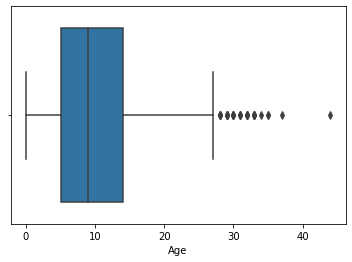

In [23]:
sns.boxplot('Age', data=table_);

In [24]:
table_[table_.Age > 26]   #no problem for outliers.

,Brands,Models,Body_Type,Age,Hp,Gear,Fuel,Cons,CO2_E,Km,Price
129,Nissan,Micra,Compact,31,50,Manual,Gasoline,6.5,143,104000,3500
1126,Mitsubishi,Space Runner,Stationwagon,28,122,Automatic,Gasoline,0.0,0,98400,2950
2550,Volkswagen,Passat Variant,Stationwagon,29,90,Automatic,Gasoline,8.8,0,214441,900
2670,Mercedes-Benz,E 300,Stationwagon,31,179,Automatic,Gasoline,0.0,0,227000,14900
4361,Opel,Kadett,Sedan,30,75,Automatic,Gasoline,0.0,0,74000,2800
4495,Mercedes-Benz,E 200,Sedan,28,118,Manual,Gasoline,0.0,0,80100,7200
4562,Mercedes-Benz,190,Sedan,27,122,Automatic,Gasoline,0.0,0,83000,9900
4691,Chevrolet,Caprice,Sedan,27,173,Automatic,LPG,11.0,158,90000,15010
4738,Mercedes-Benz,190,Sedan,32,72,Manual,Diesel,0.0,0,91700,7900
4810,Mercedes-Benz,190,Sedan,37,122,Automatic,Gasoline,0.0,0,94866,6950


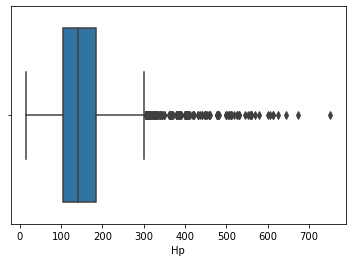

In [25]:
sns.boxplot('Hp', data=table_);

In [26]:
table_[table_.Hp > 300]   #no problem for outliers.

,Brands,Models,Body_Type,Age,Hp,Gear,Fuel,Cons,CO2_E,Km,Price
254,Volkswagen,Golf GTI,Compact,8,310,Automatic,Gasoline,8.0,185,130000,24500
261,Audi,A6,Stationwagon,1,340,Automatic,Gasoline,7.3,165,10500,69899
263,Audi,S6,Stationwagon,1,349,Automatic,Diesel,6.5,171,10800,72900
285,BMW,340,Stationwagon,2,326,Automatic,Gasoline,8.0,182,17700,33500
298,Mercedes-Benz,CLA 35 AMG,Stationwagon,0,306,Automatic,Gasoline,7.4,168,19600,50000
...,...,...,...,...,...,...,...,...,...,...,...
7850,Mercedes-Benz,C 63 AMG,Sedan,5,510,Automatic,Gasoline,8.2,192,89582,48500
7861,BMW,740,Sedan,12,326,Automatic,Gasoline,9.9,232,122000,14999
7870,Porsche,Panamera,Sedan,9,479,Automatic,Gasoline,10.8,254,122000,36600
7872,BMW,550,Sedan,13,367,Manual,Gasoline,10.9,260,160000,24000


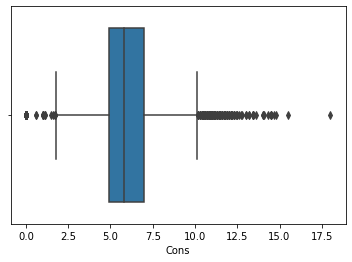

In [27]:
sns.boxplot('Cons', data=table_);

In [28]:
table_[table_.Cons > 10]   #outliers more than 10 are normal.

,Brands,Models,Body_Type,Age,Hp,Gear,Fuel,Cons,CO2_E,Km,Price
488,Mercedes-Benz,B 200,Stationwagon,4,156,Automatic,Gasoline,12.0,127,44000,18888
628,Mercedes-Benz,C 63 AMG,Stationwagon,8,457,Automatic,Gasoline,12.2,285,56000,42000
680,Mercedes-Benz,C 63 AMG,Stationwagon,8,568,Automatic,Gasoline,12.2,285,61000,49000
754,Audi,RS4,Stationwagon,7,450,Automatic,Gasoline,10.7,249,69000,42999
1040,Audi,RS4,Stationwagon,6,450,Automatic,Gasoline,10.7,249,91148,44500
...,...,...,...,...,...,...,...,...,...,...,...
7856,Mercedes-Benz,E 280,Sedan,19,204,Automatic,Gasoline,11.5,275,121500,3950
7870,Porsche,Panamera,Sedan,9,479,Automatic,Gasoline,10.8,254,122000,36600
7872,BMW,550,Sedan,13,367,Manual,Gasoline,10.9,260,160000,24000
7878,Mercedes-Benz,C 280,Sedan,24,193,Automatic,Gasoline,11.0,262,160000,4999


In [29]:
table_[table_.Cons == 0]   # Zero values ---> Mean

,Brands,Models,Body_Type,Age,Hp,Gear,Fuel,Cons,CO2_E,Km,Price
19,Renault,ZOE,Compact,6,92,Automatic,Electric,0.0,0,32500,7750
126,Ford,Fusion,Compact,17,102,Manual,Gasoline,0.0,0,103000,1600
236,Volkswagen,Polo,Compact,26,45,Manual,Gasoline,0.0,0,243422,900
1126,Mitsubishi,Space Runner,Stationwagon,28,122,Automatic,Gasoline,0.0,0,98400,2950
1314,Volkswagen,Caddy,Stationwagon,8,109,Manual,CNG,0.0,0,111500,9440
...,...,...,...,...,...,...,...,...,...,...,...
7742,Mercedes-Benz,E 230,Sedan,32,132,Automatic,Gasoline,0.0,0,277600,2850
7773,Mercedes-Benz,320,Sedan,29,231,Automatic,Gasoline,0.0,0,289500,5900
7787,Mercedes-Benz,E 230,Sedan,29,132,Automatic,LPG,0.0,0,297000,3200
7807,Nissan,Leaf,Sedan,4,109,Automatic,Electric,0.0,0,50600,12800


In [30]:
table_['Cons'] = table_['Cons'].replace({0.0:np.nan}).astype(float)
table_["Cons"] = table_["Cons"].fillna(value=table_["Cons"].mean())
table_.sample(5)

,Brands,Models,Body_Type,Age,Hp,Gear,Fuel,Cons,CO2_E,Km,Price
6624,BMW,316,Sedan,20,105,Manual,Gasoline,7.8,187,170000,1700
3454,Volvo,S80,Sedan,12,260,Manual,Diesel,6.0,188,26000,16500
4683,Mercedes-Benz,C 250,Sedan,5,204,Automatic,Diesel,4.3,109,90000,28000
484,Volkswagen,Touran,Stationwagon,4,150,Automatic,Diesel,4.6,120,44000,23000
4920,Peugeot,3008,Sedan,9,111,Automatic,Diesel,4.9,129,99000,5390


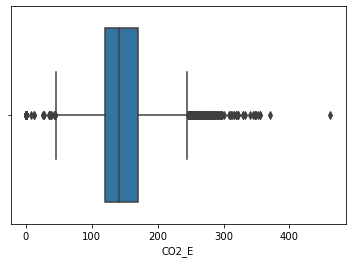

In [31]:
sns.boxplot('CO2_E', data=table_);

In [32]:
table_[table_.CO2_E == 0]     # Zero values ---> Mean

,Brands,Models,Body_Type,Age,Hp,Gear,Fuel,Cons,CO2_E,Km,Price
19,Renault,ZOE,Compact,6,92,Automatic,Electric,6.123724,0,32500,7750
126,Ford,Fusion,Compact,17,102,Manual,Gasoline,6.123724,0,103000,1600
236,Volkswagen,Polo,Compact,26,45,Manual,Gasoline,6.123724,0,243422,900
1126,Mitsubishi,Space Runner,Stationwagon,28,122,Automatic,Gasoline,6.123724,0,98400,2950
1314,Volkswagen,Caddy,Stationwagon,8,109,Manual,CNG,6.123724,0,111500,9440
...,...,...,...,...,...,...,...,...,...,...,...
7773,Mercedes-Benz,320,Sedan,29,231,Automatic,Gasoline,6.123724,0,289500,5900
7787,Mercedes-Benz,E 230,Sedan,29,132,Automatic,LPG,6.123724,0,297000,3200
7802,Mercedes-Benz,190,Sedan,33,72,Manual,Diesel,6.000000,0,300000,3000
7807,Nissan,Leaf,Sedan,4,109,Automatic,Electric,6.123724,0,50600,12800


In [33]:
table_['CO2_E'] = table_['CO2_E'].replace({0:np.nan}).astype(float)
table_["CO2_E"] = table_["CO2_E"].fillna(value=table_["CO2_E"].mean())

In [34]:
table_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7910 entries, 0 to 7909
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brands     7910 non-null   object 
 1   Models     7910 non-null   object 
 2   Body_Type  7910 non-null   object 
 3   Age        7910 non-null   int64  
 4   Hp         7910 non-null   int64  
 5   Gear       7910 non-null   object 
 6   Fuel       7910 non-null   object 
 7   Cons       7910 non-null   float64
 8   CO2_E      7910 non-null   float64
 9   Km         7910 non-null   int64  
 10  Price      7910 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 741.6+ KB


In [35]:
table_.describe()

,Age,Hp,Cons,CO2_E,Km,Price
count,7910.000000,7910.000000,7910.000000,7910.000000,7910.000000,7910.000000
mean,9.960556,152.088496,6.123724,150.569512,131916.510240,10786.250822
std,5.795627,72.415660,1.700440,39.910772,67795.149498,9660.568046
min,0.000000,15.000000,0.600000,7.000000,10022.000000,500.000000
25%,5.000000,105.000000,4.900000,122.000000,78000.000000,3850.000000
50%,9.000000,140.000000,5.800000,143.000000,129000.000000,7999.000000
75%,14.000000,184.000000,7.000000,170.000000,180000.000000,14950.000000
max,44.000000,751.000000,18.000000,462.000000,300000.000000,98000.000000


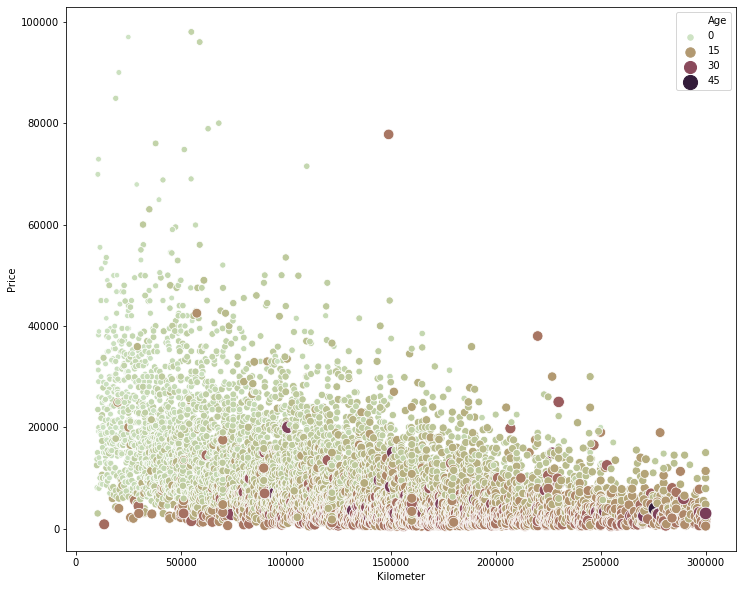

In [36]:
plt.figure(figsize=(12,10))
cmap = sns.cubehelix_palette(rot=.7, as_cmap=True)
ax = sns.scatterplot(x="Km", y="Price",
                     hue="Age", size ="Age",
                     palette=cmap, sizes=(30, 200),
                     data=table_)
plt.xlabel("Kilometer")
plt.ylabel("Price")
plt.savefig("Km-Price-Age.jpeg", dpi = 500)
plt.show()

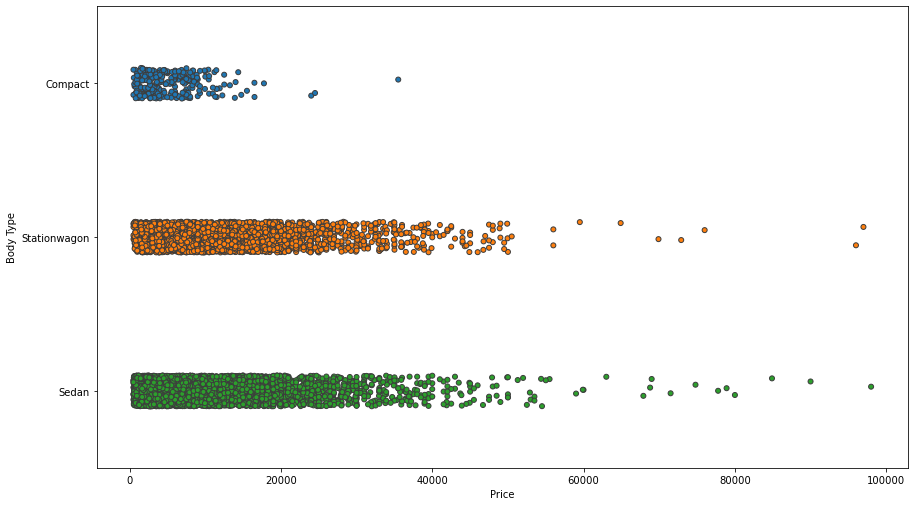

In [37]:
fig, ax = plt.subplots(figsize=[12,7])
plt.tight_layout() 
a=sns.stripplot(x ="Price", y ="Body_Type", jitter=True, linewidth=1, data=table_)

plt.xlabel("Price")
plt.ylabel("Body Type")
plt.savefig("price-body.jpeg", bbox_inches = "tight")
plt.show()

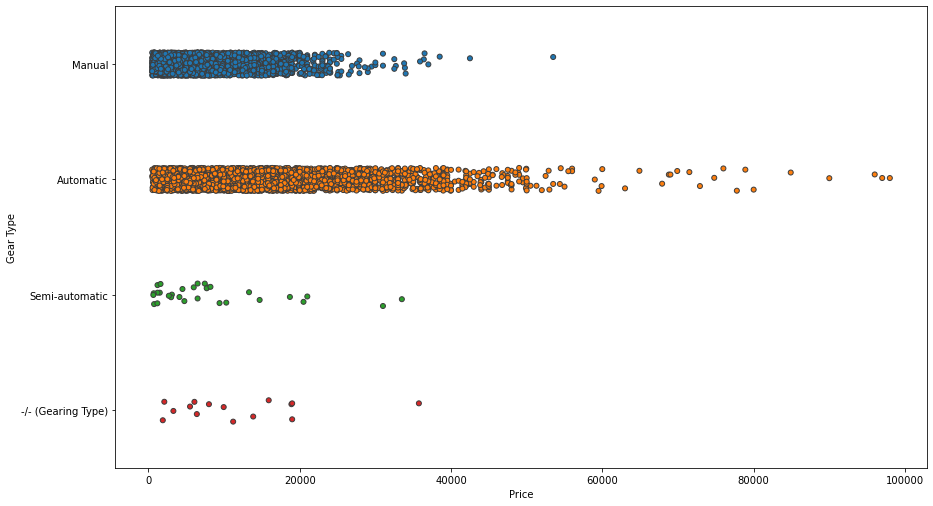

In [38]:
fig, ax = plt.subplots(figsize=[12,7])
plt.tight_layout() 
a=sns.stripplot(x ="Price", y ="Gear", jitter=True, linewidth=1, data=table_)

plt.xlabel("Price")
plt.ylabel("Gear Type")
plt.savefig("price-gear.jpeg", bbox_inches = "tight")
plt.show()

In [39]:
table_.loc[table_.Gear == '-/- (Gearing Type)', 'Gear'] = 'Manual'


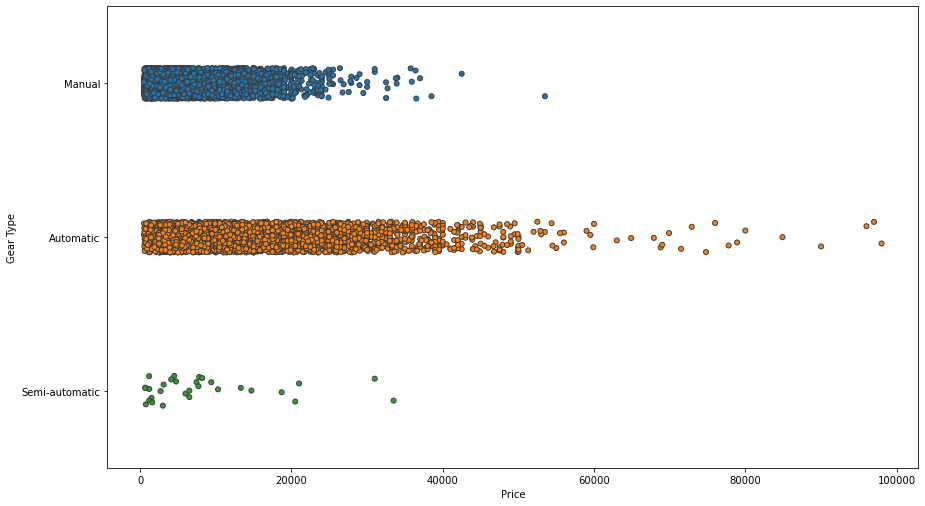

In [40]:
fig, ax = plt.subplots(figsize=[12,7])
plt.tight_layout() 
a=sns.stripplot(x ="Price", y ="Gear", jitter=True, linewidth=1, data=table_)

plt.xlabel("Price")
plt.ylabel("Gear Type")
plt.savefig("price-gear2.jpeg", bbox_inches = "tight")
plt.show()

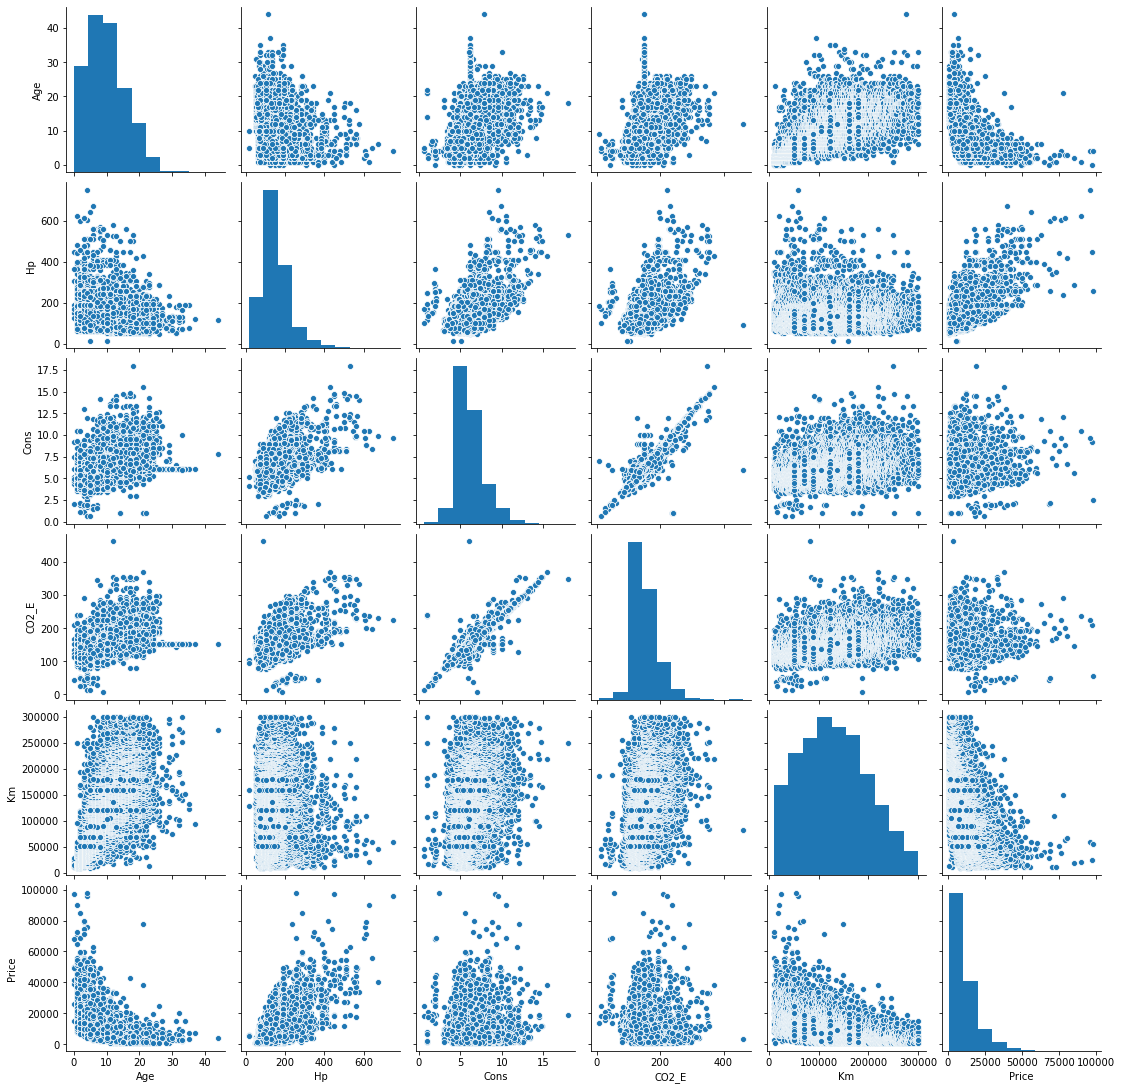

In [41]:
sns.pairplot(table_)
plt.savefig('pairplot.png')

In [42]:
table_.corr()

,Age,Hp,Cons,CO2_E,Km,Price
Age,1.000000,-0.194873,0.548982,0.575009,0.595268,-0.640110
Hp,-0.194873,1.000000,0.411986,0.442771,0.008664,0.661239
Cons,0.548982,0.411986,1.000000,0.949418,0.306613,-0.114067
CO2_E,0.575009,0.442771,0.949418,1.000000,0.399440,-0.125840
Km,0.595268,0.008664,0.306613,0.399440,1.000000,-0.494650
Price,-0.640110,0.661239,-0.114067,-0.125840,-0.494650,1.000000


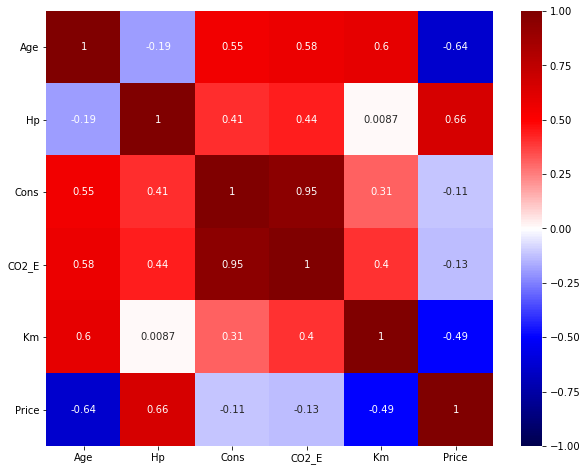

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(table_.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);
plt.yticks(rotation=360)
plt.savefig("heatcorr.jpeg", dpi = 600)
plt.show()

In [44]:
# first OLS with current numeric data

X = table_.drop(columns=["Brands","Models", "Body_Type", "Gear", "Fuel", "Price"]).astype(float)
y = table_.loc[:,"Price"].astype(float)

model = sm.OLS(y, X, data=table_)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.853
Method:                 Least Squares   F-statistic:                              9172.
Date:                Sat, 09 Jan 2021   Prob (F-statistic):                        0.00
Time:                        23:45:36   Log-Likelihood:                         -79423.
No. Observations:                7910   AIC:                                  1.589e+05
Df Residuals:                    7905   BIC:                                  1.589e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age         -504.8913     18.730    -26.956      0.000    -541.607    -468.175
Hp            96.2532      1.228     78.356      0.000      93.845      98.661
Cons         -79.8197    122.021     -0.654      0.513    -319.012     159.373
CO2_E         32.2353      5.515      5.845      0.000      21.424      43.046
Km            -0.0301      0.001    -25.418      0.000      -0.032      -0.028
==============================================================================
Omnibus:                     2372.151   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50673.908
Skew:                           0.920   Prob(JB):                         0.00
Kurtosis:                      15.262   Cond. No.                     2.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
#set up the 3 models we're choosing from:

def get_model(X,y):
    X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=3)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

    #Linear Regression
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
    print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')
    print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')
    
    #Polinomial Regression
    for i in np.arange(2,6,1):
        poly = PolynomialFeatures(degree=i) 
        X_train_poly = poly.fit_transform(X_train.values)
        X_val_poly = poly.transform(X_val.values)
        X_test_poly = poly.transform(X_test.values)
        lm_poly = LinearRegression()
        lm_poly.fit(X_train_poly, y_train)
        print(f'Degree {i} polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
        print(f'Degree {i} polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')
        print(f'Degree {i} polynomial regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')
        
         #PolyRidge
        lm_poly_ri = Ridge(alpha=0.5)
        lm_poly_ri.fit(X_train_poly, y_train)
        print(f'Degree {i} Ridge polynomial regression train R^2: {lm_poly_ri.score(X_train_poly, y_train):.3f}')
        print(f'Degree {i} Ridge polynomial regression val R^2: {lm_poly_ri.score(X_val_poly, y_val):.3f}')
        print(f'Degree {i} Ridge polynomial regression test R^2: {lm_poly_ri.score(X_test_poly, y_test):.3f}')
    
    #Ridge
    lm_reg = Ridge(alpha=0.5)
    lm_reg.fit(X_train, y_train)
    print(f'Ridge Regression train R^2: {lm_reg.score(X_train, y_train):.3f}')
    print(f'Ridge Regression val R^2: {lm_reg.score(X_val, y_val):.3f}')
    print(f'Ridge Regression test R^2: {lm_reg.score(X_test, y_test):.3f}')
    
    #Lasso
    lm_las = Lasso(alpha=0.5)
    lm_las.fit(X_train, y_train)
    print(f'Lasso Regression train R^2: {lm_las.score(X_train, y_train):.3f}')
    print(f'Lasso Regression val R^2: {lm_las.score(X_val, y_val):.3f}')
    print(f'Lasso Regression test R^2: {lm_las.score(X_test, y_test):.3f}')


In [95]:
get_model(X,y)

Linear Regression train R^2: 0.773
Linear Regression val R^2: 0.779
Linear Regression test R^2: 0.789
Degree 2 polynomial regression train R^2: 0.852
Degree 2 polynomial regression val R^2: 0.860
Degree 2 polynomial regression test R^2: 0.855
Degree 2 Ridge polynomial regression train R^2: 0.852
Degree 2 Ridge polynomial regression val R^2: 0.860
Degree 2 Ridge polynomial regression test R^2: 0.855
Degree 3 polynomial regression train R^2: 0.734
Degree 3 polynomial regression val R^2: 0.716
Degree 3 polynomial regression test R^2: -5.904
Degree 3 Ridge polynomial regression train R^2: 0.863
Degree 3 Ridge polynomial regression val R^2: 0.867
Degree 3 Ridge polynomial regression test R^2: 0.749
Degree 4 polynomial regression train R^2: -1.766
Degree 4 polynomial regression val R^2: -2.313
Degree 4 polynomial regression test R^2: -66.575
Degree 4 Ridge polynomial regression train R^2: 0.873
Degree 4 Ridge polynomial regression val R^2: 0.849
Degree 4 Ridge polynomial regression test R^2:

C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.75522e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.92999e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.58452e-47): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.70311e-58): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [96]:
def cross_vals(X,y):
    
    #test
    X, X_test, y, y_test = train_test_split(X, y, test_size = .25, random_state = 3)
    
    #train val 
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .2, random_state = 3)
    
    #LinearCV
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    print(f'Linear Regression CV train : {cross_val_score(lm, X_train, y_train, cv=7).mean()}')
    
    #Polinomial Regression
    for i in np.arange(2,6,1):
        poly = PolynomialFeatures(degree=i) 
        X_train_poly = poly.fit_transform(X_train.values)
        X_val_poly = poly.transform(X_val.values)
        X_test_poly = poly.transform(X_test.values)
        lm_poly = LinearRegression()
        lm_poly.fit(X_train_poly, y_train)
        print(f'Degree {i} Polynomial CV train : {cross_val_score(lm_poly, X_train_poly, y_train, cv=7).mean()}')
    
    #PolyRidge 
        lm_poly_ri = Ridge(alpha=0.5)
        lm_poly_ri.fit(X_train_poly, y_train)
        print(f'Degree {i} Polynomial Ridge CV train : {cross_val_score(lm_poly_ri, X_train_poly, y_train, cv=7).mean()}')
    
    #Ridge
    lm_reg = Ridge(alpha=0.5)
    lm_reg.fit(X_train, y_train)
    print(f'Ridge CV train : {cross_val_score(lm_reg, X_train, y_train, cv=7).mean()}')
    
    #Lasso
    lm_las = Lasso(alpha=0.5)
    lm_las.fit(X_train, y_train)
    print(f'Lasso CV train : {cross_val_score(lm_las, X_train, y_train, cv=7).mean()}')

In [97]:
cross_vals(X,y)

Linear Regression CV train : 0.768883076303602
Degree 2 Polynomial CV train : 0.8446107363757253
Degree 2 Polynomial Ridge CV train : 0.8446146269201618
Degree 3 Polynomial CV train : 0.6279048237874577
Degree 3 Polynomial Ridge CV train : 0.8166561725164007


C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.64497e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.0689e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.06538e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.15884e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.03772e-25): result 

Degree 4 Polynomial CV train : 0.6502757389364119
Degree 4 Polynomial Ridge CV train : -0.24090741746730596


C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.19548e-47): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.99133e-47): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.02956e-47): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.34016e-47): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.88102e-47): result

Degree 5 Polynomial CV train : -30.30034820498344
Degree 5 Polynomial Ridge CV train : -264.3363970745352
Ridge CV train : 0.7688831797318498

C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.05775e-58): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.1293e-58): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.20217e-58): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.66865e-58): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.95705e-58): result 


Lasso CV train : 0.7688832916206252


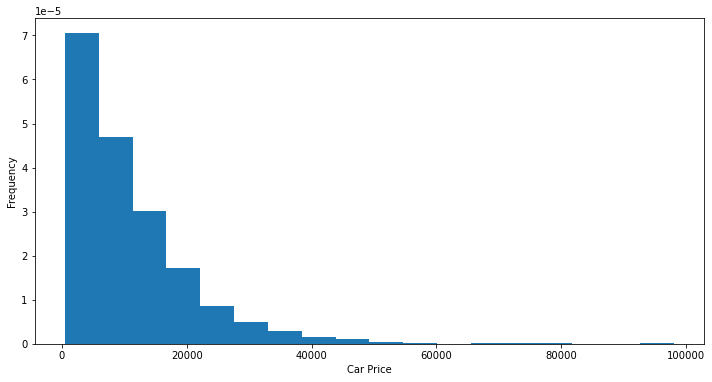

In [45]:
# Araç fiyat dağılımı
plt.figure(figsize=[12,6])
table_["Price"].plot.hist(density=True, bins = 18)
plt.xlabel("Car Price")
plt.ylabel("Frequency")
plt.savefig("carprice1.jpeg", dpi = 500)
plt.show()

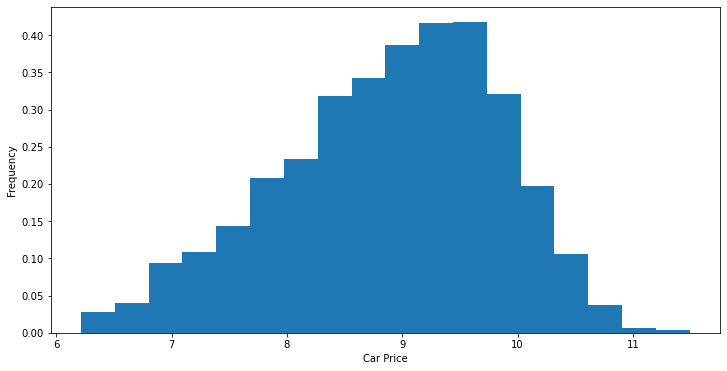

In [46]:
# Araç fiyat dağılımı
plt.figure(figsize=[12,6])
np.log(table_["Price"]).plot.hist(density=True, bins = 18)
plt.xlabel("Car Price")
plt.ylabel("Frequency")
plt.savefig("carprice2.jpeg", dpi = 500)
plt.show()

In [47]:
table_["Price"] = np.log(table_["Price"])   #using log of price

In [48]:
X = table_.drop(columns=["Brands","Models", "Body_Type", "Gear", "Fuel", "Price"]).astype(float)
y = table_.loc[:,"Price"].astype(float)

In [102]:
get_model(X,y)

Linear Regression train R^2: 0.822
Linear Regression val R^2: 0.823
Linear Regression test R^2: 0.818
Degree 2 polynomial regression train R^2: 0.877
Degree 2 polynomial regression val R^2: 0.874
Degree 2 polynomial regression test R^2: 0.872
Degree 2 Ridge polynomial regression train R^2: 0.877
Degree 2 Ridge polynomial regression val R^2: 0.874
Degree 2 Ridge polynomial regression test R^2: 0.872
Degree 3 polynomial regression train R^2: 0.834
Degree 3 polynomial regression val R^2: 0.816
Degree 3 polynomial regression test R^2: -2.305
Degree 3 Ridge polynomial regression train R^2: 0.887
Degree 3 Ridge polynomial regression val R^2: 0.862
Degree 3 Ridge polynomial regression test R^2: 0.843
Degree 4 polynomial regression train R^2: -0.369
Degree 4 polynomial regression val R^2: -0.662
Degree 4 polynomial regression test R^2: -30.854
Degree 4 Ridge polynomial regression train R^2: 0.892
Degree 4 Ridge polynomial regression val R^2: 0.821
Degree 4 Ridge polynomial regression test R^2:

C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.75522e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.92999e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.58452e-47): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.70311e-58): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [103]:
model = sm.OLS(y, X, data=table_)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                          2.128e+04
Date:                Fri, 08 Jan 2021   Prob (F-statistic):                        0.00
Time:                        22:47:43   Log-Likelihood:                         -17987.
No. Observations:                7910   AIC:                                  3.598e+04
Df Residuals:                    7905   BIC:                                  3.602e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.2091      0.008    -26.360      0.000      -0.225      -0.194
Hp             0.0075      0.001     14.342      0.000       0.006       0.008
Cons           0.2910      0.052      5.630      0.000       0.190       0.392
CO2_E          0.0434      0.002     18.595      0.000       0.039       0.048
Km          7.167e-06   5.02e-07     14.280      0.000    6.18e-06    8.15e-06
==============================================================================
Omnibus:                     1478.805   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3247.003
Skew:                          -1.082   Prob(JB):                         0.00
Kurtosis:                       5.273   Cond. No.                     2.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
brand_sort = table_.Brands.value_counts()
brand_sort

Volkswagen       1282
BMW              1258
Mercedes-Benz    1071
Audi             1017
Opel              684
Ford              443
SEAT              268
Renault           251
Skoda             216
Peugeot           157
MINI              130
Fiat              128
Toyota            128
Citroen           122
Hyundai            97
Mazda              85
Volvo              79
Kia                77
Nissan             52
Honda              49
Alfa               41
Mitsubishi         37
Suzuki             32
smart              29
Jaguar             27
Dacia              24
Chevrolet          20
Subaru             13
Chrysler           12
Porsche            12
Saab               12
Lexus              12
Lancia              8
Abarth              5
Maserati            4
Tesla               4
Alpina              4
Daihatsu            4
DS                  3
Dodge               3
Infiniti            3
Land                2
Cadillac            2
MG                  1
Acura               1
Daewoo    

In [50]:
brnd = list(brand_sort[brand_sort < 100].index)
table_["Brands"] = table_["Brands"].replace(brnd,"Other")

In [51]:
table_br_d = pd.get_dummies(table_['Brands'])
table_ = table_.drop('Brands', axis = 1)
table_ = table_.join(table_br_d)
table_.head()

,Models,Body_Type,Age,Hp,Gear,Fuel,Cons,CO2_E,Km,Price,...,MINI,Mercedes-Benz,Opel,Other,Peugeot,Renault,SEAT,Skoda,Toyota,Volkswagen
0,595 Pista,Compact,1,160,Manual,Gasoline,6.9,158.0,13500,9.711055,...,0,0,0,1,0,0,0,0,0,0
1,Corsa,Compact,2,90,Manual,Gasoline,6.4,128.0,16000,9.254357,...,0,0,1,0,0,0,0,0,0,0
2,Yaris,Compact,1,111,Manual,Gasoline,5.1,116.0,17000,9.571505,...,0,0,0,0,0,0,0,0,1,0
3,Swift,Compact,1,111,Manual,Electric/Gasoline,4.3,123.0,17000,9.323669,...,0,0,0,1,0,0,0,0,0,0
4,Aygo,Compact,12,77,Automatic,Gasoline,4.6,108.0,17500,8.699348,...,0,0,0,0,0,0,0,0,1,0


In [52]:
X = table_.drop(columns=["Models", "Body_Type", "Gear", "Fuel", "Price"]).astype(float)
y = table_.loc[:,"Price"].astype(float)

In [108]:
get_model(X,y)

Linear Regression train R^2: 0.859
Linear Regression val R^2: 0.861
Linear Regression test R^2: 0.856
Degree 2 polynomial regression train R^2: 0.907
Degree 2 polynomial regression val R^2: 0.902
Degree 2 polynomial regression test R^2: 0.894
Degree 2 Ridge polynomial regression train R^2: 0.907
Degree 2 Ridge polynomial regression val R^2: 0.902
Degree 2 Ridge polynomial regression test R^2: 0.894


C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.70595e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Degree 3 polynomial regression train R^2: 0.904
Degree 3 polynomial regression val R^2: 0.851
Degree 3 polynomial regression test R^2: 0.466
Degree 3 Ridge polynomial regression train R^2: 0.799
Degree 3 Ridge polynomial regression val R^2: 0.651
Degree 3 Ridge polynomial regression test R^2: -1.075
Degree 4 polynomial regression train R^2: 0.798
Degree 4 polynomial regression val R^2: 0.668
Degree 4 polynomial regression test R^2: 0.560


C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Degree 4 Ridge polynomial regression train R^2: 0.229
Degree 4 Ridge polynomial regression val R^2: 0.291
Degree 4 Ridge polynomial regression test R^2: 0.226
Degree 5 polynomial regression train R^2: 0.823
Degree 5 polynomial regression val R^2: 0.602
Degree 5 polynomial regression test R^2: -0.147


C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Degree 5 Ridge polynomial regression train R^2: 0.428
Degree 5 Ridge polynomial regression val R^2: 0.398
Degree 5 Ridge polynomial regression test R^2: 0.410
Ridge Regression train R^2: 0.859
Ridge Regression val R^2: 0.861
Ridge Regression test R^2: 0.856
Lasso Regression train R^2: 0.799
Lasso Regression val R^2: 0.795
Lasso Regression test R^2: 0.801


In [109]:
model = sm.OLS(y, X, data=table_)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     2541.
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:57:36   Log-Likelihood:                -3080.9
No. Observations:                7910   AIC:                             6202.
Df Residuals:                    7890   BIC:                             6341.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age              -0.0894      0.001    -72.039      0.000      -0.092      -0.087
Hp                0.0053    8.8e-05     60.345      0.000       0.005       0.005
Cons             -0.0555      0.008     -6.999      0.000      -0.071      -0.040
CO2_E             0.0012      0.000      3.421      0.001       0.001       0.002
Km            -3.205e-06   7.92e-08    -40.472      0.000   -3.36e-06   -3.05e-06
Audi              9.7476      0.021    461.952      0.000       9.706       9.789
BMW               9.7218      0.021    465.854      0.000       9.681       9.763
Citroen           9.2361      0.036    259.531      0.000       9.166       9.306
Fiat              9.1359      0.035    262.611      0.000       9.068       9.204
Ford              9.2852      0.023    405.149      0.000       9.240       9.330
MINI              9.6331      0.035    277.565      0.000       9.565       9.701
Mercedes-Benz     9.7913      0.022    454.486      0.000       9.749       9.834
Opel              9.2826      0.021    434.589      0.000       9.241       9.324
Other             9.3694      0.021    444.566      0.000       9.328       9.411
Peugeot           9.2145      0.032    285.073      0.000       9.151       9.278
Renault           9.1995      0.027    339.922      0.000       9.146       9.253
SEAT              9.3822      0.026    354.599      0.000       9.330       9.434
Skoda             9.4913      0.029    331.477      0.000       9.435       9.547
Toyota            9.4501      0.034    274.327      0.000       9.383       9.518
Volkswagen        9.5903      0.019    517.687      0.000       9.554       9.627
==============================================================================
Omnibus:                     1394.872   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14524.325
Skew:                           0.533   Prob(JB):                         0.00
Kurtosis:                       9.552   Cond. No.                     2.38e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
body_sort = table_.Body_Type.value_counts()
body_sort

Sedan           4654
Stationwagon    2995
Compact          261
Name: Body_Type, dtype: int64

In [54]:
body_d = pd.get_dummies(table_['Body_Type'])
table_ = table_.drop('Body_Type',axis = 1)
table_ = table_.join(body_d)
table_.sample(5)

,Models,Age,Hp,Gear,Fuel,Cons,CO2_E,Km,Price,Audi,...,Other,Peugeot,Renault,SEAT,Skoda,Toyota,Volkswagen,Compact,Sedan,Stationwagon
2420,325,16,192,Automatic,LPG,10.1,245.0,199999,8.465900,0,...,0,0,0,0,0,0,0,0,0,1
3096,RS3,2,400,Automatic,Gasoline,8.1,189.0,40000,10.829709,1,...,0,0,0,0,0,0,0,0,0,1
2648,C 180,18,129,Manual,Gasoline,8.5,230.0,225000,7.673223,0,...,0,0,0,0,0,0,0,0,0,1
3717,A3,4,110,Automatic,Diesel,4.0,104.0,40000,9.680344,1,...,0,0,0,0,0,0,0,0,1,0
3719,Focus,3,349,Manual,Gasoline,7.7,175.0,40000,10.341742,0,...,0,0,0,0,0,0,0,0,1,0


In [55]:
X = table_.drop(columns=["Models", "Gear", "Fuel", "Price"]).astype(float)
y = table_.loc[:,"Price"].astype(float)

In [113]:
get_model(X,y)

Linear Regression train R^2: 0.861
Linear Regression val R^2: 0.863
Linear Regression test R^2: 0.858
Degree 2 polynomial regression train R^2: 0.909
Degree 2 polynomial regression val R^2: 0.903
Degree 2 polynomial regression test R^2: 0.891
Degree 2 Ridge polynomial regression train R^2: 0.909
Degree 2 Ridge polynomial regression val R^2: 0.903
Degree 2 Ridge polynomial regression test R^2: 0.891


C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.60408e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Degree 3 polynomial regression train R^2: 0.739
Degree 3 polynomial regression val R^2: 0.504
Degree 3 polynomial regression test R^2: -3.134
Degree 3 Ridge polynomial regression train R^2: 0.751
Degree 3 Ridge polynomial regression val R^2: 0.633
Degree 3 Ridge polynomial regression test R^2: -0.428
Degree 4 polynomial regression train R^2: 0.273
Degree 4 polynomial regression val R^2: -0.927
Degree 4 polynomial regression test R^2: -17.234


C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Degree 4 Ridge polynomial regression train R^2: 0.183
Degree 4 Ridge polynomial regression val R^2: 0.220
Degree 4 Ridge polynomial regression test R^2: 0.162
Degree 5 polynomial regression train R^2: -1.336
Degree 5 polynomial regression val R^2: -4.287
Degree 5 polynomial regression test R^2: -9.330


C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Degree 5 Ridge polynomial regression train R^2: 0.177
Degree 5 Ridge polynomial regression val R^2: 0.244
Degree 5 Ridge polynomial regression test R^2: 0.199
Ridge Regression train R^2: 0.861
Ridge Regression val R^2: 0.863
Ridge Regression test R^2: 0.858
Lasso Regression train R^2: 0.799
Lasso Regression val R^2: 0.795
Lasso Regression test R^2: 0.801


In [114]:
model = sm.OLS(y, X, data=table_)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2329.
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:03:57   Log-Likelihood:                -3036.4
No. Observations:                7910   AIC:                             6117.
Df Residuals:                    7888   BIC:                             6270.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age              -0.0873      0.001    -68.993      0.000      -0.090      -0.085
Hp                0.0053   8.77e-05     60.052      0.000       0.005       0.005
Cons             -0.0471      0.008     -5.923      0.000      -0.063      -0.031
CO2_E             0.0008      0.000      2.132      0.033    6.28e-05       0.001
Km            -3.335e-06   8.06e-08    -41.399      0.000   -3.49e-06   -3.18e-06
Audi              1.8737      0.013    145.073      0.000       1.848       1.899
BMW               1.8598      0.013    147.963      0.000       1.835       1.884
Citroen           1.3683      0.031     44.389      0.000       1.308       1.429
Fiat              1.2831      0.030     42.431      0.000       1.224       1.342
Ford              1.4120      0.017     83.796      0.000       1.379       1.445
MINI              1.7856      0.030     59.554      0.000       1.727       1.844
Mercedes-Benz     1.9250      0.013    149.363      0.000       1.900       1.950
Opel              1.4147      0.014     99.827      0.000       1.387       1.442
Other             1.5126      0.014    110.564      0.000       1.486       1.539
Peugeot           1.3373      0.027     48.873      0.000       1.284       1.391
Renault           1.3314      0.022     60.878      0.000       1.289       1.374
SEAT              1.5206      0.021     71.739      0.000       1.479       1.562
Skoda             1.6034      0.024     67.954      0.000       1.557       1.650
Toyota            1.5896      0.030     52.863      0.000       1.531       1.649
Volkswagen        1.7228      0.011    157.114      0.000       1.701       1.744
Compact           7.7409      0.024    323.919      0.000       7.694       7.788
Sedan             7.8680      0.014    545.284      0.000       7.840       7.896
Stationwagon      7.9310      0.016    504.974      0.000       7.900       7.962
==============================================================================
Omnibus:                     1364.106   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14144.955
Skew:                           0.513   Prob(JB):                         0.00
Kurtosis:                       9.470   Cond. No.                     2.62e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.54e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
gear_sort = table_.Gear.value_counts()
gear_sort    

Manual            4441
Automatic         3439
Semi-automatic      30
Name: Gear, dtype: int64

In [57]:
gear_d = pd.get_dummies(table_['Gear'])
table_ = table_.drop('Gear',axis = 1)
table_ = table_.join(gear_d)
table_.head()

,Models,Age,Hp,Fuel,Cons,CO2_E,Km,Price,Audi,BMW,...,SEAT,Skoda,Toyota,Volkswagen,Compact,Sedan,Stationwagon,Automatic,Manual,Semi-automatic
0,595 Pista,1,160,Gasoline,6.9,158.0,13500,9.711055,0,0,...,0,0,0,0,1,0,0,0,1,0
1,Corsa,2,90,Gasoline,6.4,128.0,16000,9.254357,0,0,...,0,0,0,0,1,0,0,0,1,0
2,Yaris,1,111,Gasoline,5.1,116.0,17000,9.571505,0,0,...,0,0,1,0,1,0,0,0,1,0
3,Swift,1,111,Electric/Gasoline,4.3,123.0,17000,9.323669,0,0,...,0,0,0,0,1,0,0,0,1,0
4,Aygo,12,77,Gasoline,4.6,108.0,17500,8.699348,0,0,...,0,0,1,0,1,0,0,1,0,0


In [58]:
X = table_.drop(columns=["Models", "Fuel", "Price"]).astype(float)
y = table_.loc[:,"Price"].astype(float)

In [118]:
get_model(X,y)

Linear Regression train R^2: 0.866
Linear Regression val R^2: 0.866
Linear Regression test R^2: 0.863
Degree 2 polynomial regression train R^2: 0.912
Degree 2 polynomial regression val R^2: 0.904
Degree 2 polynomial regression test R^2: 0.894
Degree 2 Ridge polynomial regression train R^2: 0.912
Degree 2 Ridge polynomial regression val R^2: 0.905
Degree 2 Ridge polynomial regression test R^2: 0.896


C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.26854e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Degree 3 polynomial regression train R^2: 0.913
Degree 3 polynomial regression val R^2: 0.667
Degree 3 polynomial regression test R^2: 0.016
Degree 3 Ridge polynomial regression train R^2: 0.916
Degree 3 Ridge polynomial regression val R^2: -22.718
Degree 3 Ridge polynomial regression test R^2: -509.780
Degree 4 polynomial regression train R^2: 0.179
Degree 4 polynomial regression val R^2: -39.716
Degree 4 polynomial regression test R^2: -5.537


C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Degree 4 Ridge polynomial regression train R^2: 0.272
Degree 4 Ridge polynomial regression val R^2: 0.345
Degree 4 Ridge polynomial regression test R^2: 0.296
Degree 5 polynomial regression train R^2: 0.462
Degree 5 polynomial regression val R^2: -27.299
Degree 5 polynomial regression test R^2: -5.649


C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Degree 5 Ridge polynomial regression train R^2: 0.432
Degree 5 Ridge polynomial regression val R^2: 0.414
Degree 5 Ridge polynomial regression test R^2: 0.407
Ridge Regression train R^2: 0.866
Ridge Regression val R^2: 0.866
Ridge Regression test R^2: 0.863
Lasso Regression train R^2: 0.799
Lasso Regression val R^2: 0.795
Lasso Regression test R^2: 0.801


In [119]:
model = sm.OLS(y, X, data=table_)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     2215.
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:18:51   Log-Likelihood:                -2895.8
No. Observations:                7910   AIC:                             5840.
Df Residuals:                    7886   BIC:                             6007.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Age               -0.0867      0.001    -69.659      0.000      -0.089      -0.084
Hp                 0.0049   8.94e-05     54.440      0.000       0.005       0.005
Cons              -0.0365      0.008     -4.660      0.000      -0.052      -0.021
CO2_E              0.0003      0.000      0.845      0.398      -0.000       0.001
Km             -3.239e-06   7.94e-08    -40.818      0.000    -3.4e-06   -3.08e-06
Audi               1.1430      0.013     90.651      0.000       1.118       1.168
BMW                1.1301      0.012     92.428      0.000       1.106       1.154
Citroen            0.6580      0.030     21.772      0.000       0.599       0.717
Fiat               0.5918      0.030     19.914      0.000       0.534       0.650
Ford               0.7216      0.017     43.363      0.000       0.689       0.754
MINI               1.0887      0.029     37.019      0.000       1.031       1.146
Mercedes-Benz      1.1671      0.013     91.932      0.000       1.142       1.192
Opel               0.7151      0.014     51.439      0.000       0.688       0.742
Other              0.8099      0.013     60.344      0.000       0.784       0.836
Peugeot            0.6365      0.027     23.742      0.000       0.584       0.689
Renault            0.6351      0.022     29.513      0.000       0.593       0.677
SEAT               0.8298      0.021     39.723      0.000       0.789       0.871
Skoda              0.8962      0.023     38.665      0.000       0.851       0.942
Toyota             0.8640      0.030     29.254      0.000       0.806       0.922
Volkswagen         1.0089      0.011     92.893      0.000       0.988       1.030
Compact            4.2011      0.021    197.075      0.000       4.159       4.243
Sedan              4.3197      0.014    312.275      0.000       4.293       4.347
Stationwagon       4.3749      0.015    298.943      0.000       4.346       4.404
Automatic          4.4091      0.015    284.778      0.000       4.379       4.439
Manual             4.2482      0.014    299.283      0.000       4.220       4.276
Semi-automatic     4.2383      0.053     79.872      0.000       4.134       4.342
==============================================================================
Omnibus:                     1415.567   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15088.026
Skew:                           0.539   Prob(JB):                         0.00
Kurtosis:                       9.680   Cond. No.                     1.11e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.42e-18. This might indicate that there are
strong multicollinearit

In [59]:
fuel_sort = table_.Fuel.value_counts()
fuel_sort

Gasoline             4405
Diesel               3287
LPG                    97
Electric/Gasoline      64
CNG                    27
Electric               16
Electric/Diesel         8
Others                  5
Ethanol                 1
Name: Fuel, dtype: int64

In [60]:
#Label Encoding for Fuel type
fuels = {"Gasoline" : 1, "Diesel" : 2, "LPG" : 3, "Electric/Gasoline" : 4, 'CNG' : 5, 'Electric' : 6,
        'Electric/Diesel' : 7, 'Others':8, 'Ethanol':9}
for data in table_:
    table_["Fuels"] = table_["Fuel"].map(fuels)
    
table_.drop(columns=["Fuel"], inplace=True)
table_ = table_.reset_index()


In [61]:
table_.sample(5)

,index,Models,Age,Hp,Cons,CO2_E,Km,Price,Audi,BMW,...,Skoda,Toyota,Volkswagen,Compact,Sedan,Stationwagon,Automatic,Manual,Semi-automatic,Fuels
5205,5205,320,2,190,4.9,127.0,110000,10.081634,0,1,...,0,0,0,0,1,0,0,1,0,2
6127,6127,530,8,258,5.7,149.0,149500,9.764225,0,1,...,0,0,0,0,1,0,0,1,0,2
1792,1792,330,12,245,6.3,165.0,149500,9.392579,0,1,...,0,0,0,0,0,1,1,0,0,2
797,797,Octavia,6,220,6.2,142.0,71000,10.064756,0,0,...,1,0,0,0,0,1,0,1,0,1
7114,7114,520,9,184,4.8,125.0,197000,9.464983,0,1,...,0,0,0,0,1,0,0,1,0,2


In [62]:
X = table_.drop(columns=["Models",  "Price"]).astype(float)
y = table_.loc[:,"Price"].astype(float)

In [124]:
get_model(X,y)

Linear Regression train R^2: 0.869
Linear Regression val R^2: 0.869
Linear Regression test R^2: 0.865
Degree 2 polynomial regression train R^2: 0.914
Degree 2 polynomial regression val R^2: 0.899
Degree 2 polynomial regression test R^2: 0.899
Degree 2 Ridge polynomial regression train R^2: 0.914
Degree 2 Ridge polynomial regression val R^2: 0.905
Degree 2 Ridge polynomial regression test R^2: 0.905


C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.236e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Degree 3 polynomial regression train R^2: 0.936
Degree 3 polynomial regression val R^2: 0.822
Degree 3 polynomial regression test R^2: 0.697
Degree 3 Ridge polynomial regression train R^2: 0.933
Degree 3 Ridge polynomial regression val R^2: -25460.001
Degree 3 Ridge polynomial regression test R^2: -15428.053
Degree 4 polynomial regression train R^2: 0.933
Degree 4 polynomial regression val R^2: 0.745
Degree 4 polynomial regression test R^2: 0.614


C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Degree 4 Ridge polynomial regression train R^2: -0.245
Degree 4 Ridge polynomial regression val R^2: -0.209
Degree 4 Ridge polynomial regression test R^2: 0.116
Degree 5 polynomial regression train R^2: 0.924
Degree 5 polynomial regression val R^2: 0.255
Degree 5 polynomial regression test R^2: 0.151


C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Degree 5 Ridge polynomial regression train R^2: -0.041
Degree 5 Ridge polynomial regression val R^2: -0.284
Degree 5 Ridge polynomial regression test R^2: 0.050
Ridge Regression train R^2: 0.869
Ridge Regression val R^2: 0.869
Ridge Regression test R^2: 0.865
Lasso Regression train R^2: 0.798
Lasso Regression val R^2: 0.795
Lasso Regression test R^2: 0.799


In [126]:
model = sm.OLS(y, X, data=table_)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     2089.
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:38:41   Log-Likelihood:                -2810.8
No. Observations:                7910   AIC:                             5674.
Df Residuals:                    7884   BIC:                             5855.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
index            9.54e-06   7.18e-06      1.328      0.184   -4.54e-06    2.36e-05
Age               -0.0861      0.001    -69.729      0.000      -0.089      -0.084
Hp                 0.0047   8.92e-05     52.765      0.000       0.005       0.005
Cons              -0.0068      0.008     -0.847      0.397      -0.023       0.009
CO2_E             -0.0002      0.000     -0.665      0.506      -0.001       0.000
Km             -3.604e-06   1.32e-07    -27.270      0.000   -3.86e-06   -3.35e-06
Audi               1.1267      0.013     89.854      0.000       1.102       1.151
BMW                1.1148      0.012     91.679      0.000       1.091       1.139
Citroen            0.6463      0.030     21.603      0.000       0.588       0.705
Fiat               0.5767      0.029     19.596      0.000       0.519       0.634
Ford               0.7112      0.016     43.146      0.000       0.679       0.744
MINI               1.0906      0.029     37.479      0.000       1.034       1.148
Mercedes-Benz      1.1505      0.013     91.096      0.000       1.126       1.175
Opel               0.7016      0.014     50.862      0.000       0.675       0.729
Other              0.7844      0.013     58.440      0.000       0.758       0.811
Peugeot            0.6131      0.027     23.057      0.000       0.561       0.665
Renault            0.6157      0.021     28.845      0.000       0.574       0.657
SEAT               0.8233      0.021     39.815      0.000       0.783       0.864
Skoda              0.8854      0.023     38.571      0.000       0.840       0.930
Toyota             0.8075      0.030     27.338      0.000       0.750       0.865
Volkswagen         0.9921      0.011     91.603      0.000       0.971       1.013
Compact            4.1487      0.026    161.897      0.000       4.099       4.199
Sedan              4.2051      0.028    149.219      0.000       4.150       4.260
Stationwagon       4.2862      0.017    251.348      0.000       4.253       4.320
Automatic          4.3128      0.017    253.466      0.000       4.279       4.346
Manual             4.1699      0.015    272.575      0.000       4.140       4.200
Semi-automatic     4.1573      0.053     78.614      0.000       4.054       4.261
Fuels              0.0897      0.007     13.026      0.000       0.076       0.103
==============================================================================
Omnibus:                     1415.215   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15618.473
Skew:                           0.526   Prob(JB):                         0.00
Kurtosis:                       9.803   Cond. No.                     1.17e+16
==============================================================================

Warnings:
[1] Standard Errors assum

In [63]:
X = table_.drop(columns=["Models", 'Cons', 'CO2_E', "Price"]).astype(float)
y = table_.loc[:,"Price"].astype(float)

In [128]:
get_model(X,y)

Linear Regression train R^2: 0.869
Linear Regression val R^2: 0.870
Linear Regression test R^2: 0.866
Degree 2 polynomial regression train R^2: 0.907
Degree 2 polynomial regression val R^2: 0.899
Degree 2 polynomial regression test R^2: 0.901
Degree 2 Ridge polynomial regression train R^2: 0.907
Degree 2 Ridge polynomial regression val R^2: 0.899
Degree 2 Ridge polynomial regression test R^2: 0.902


C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.2539e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Degree 3 polynomial regression train R^2: 0.922
Degree 3 polynomial regression val R^2: 0.871
Degree 3 polynomial regression test R^2: 0.895
Degree 3 Ridge polynomial regression train R^2: 0.927
Degree 3 Ridge polynomial regression val R^2: -273.843
Degree 3 Ridge polynomial regression test R^2: -105.475
Degree 4 polynomial regression train R^2: 0.925
Degree 4 polynomial regression val R^2: 0.751
Degree 4 polynomial regression test R^2: 0.878


C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Degree 4 Ridge polynomial regression train R^2: -13.760
Degree 4 Ridge polynomial regression val R^2: -13.473
Degree 4 Ridge polynomial regression test R^2: -7.705
Degree 5 polynomial regression train R^2: 0.901
Degree 5 polynomial regression val R^2: 0.416
Degree 5 polynomial regression test R^2: 0.733


C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Degree 5 Ridge polynomial regression train R^2: -12.936
Degree 5 Ridge polynomial regression val R^2: -12.839
Degree 5 Ridge polynomial regression test R^2: -9.920
Ridge Regression train R^2: 0.869
Ridge Regression val R^2: 0.870
Ridge Regression test R^2: 0.866
Lasso Regression train R^2: 0.803
Lasso Regression val R^2: 0.799
Lasso Regression test R^2: 0.798


In [130]:
cross_vals(X,y)

Linear Regression CV train : 0.8673945645622518
Degree 2 Polynomial CV train : 0.8955076166259426
Degree 2 Polynomial Ridge CV train : 0.8963240770819392


C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.20517e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39695e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39663e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43178e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37443e-25): result

Degree 3 Polynomial CV train : 0.8284630141130668
Degree 3 Polynomial Ridge CV train : -5376.268427676414
Degree 4 Polynomial CV train : 0.24871446919684445


C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\mselbicer\anaconda3\lib\sit

Degree 4 Polynomial Ridge CV train : -0.054064130521525984
Degree 5 Polynomial CV train : -0.6731759091070364


C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
C:\Users\mselbicer\anaconda3\lib\sit

Degree 5 Polynomial Ridge CV train : -0.6300491689780677
Ridge CV train : 0.867400478768637
Lasso CV train : 0.8034767893908513


In [131]:
model = sm.OLS(y, X, data=table_)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     2268.
Date:                Sat, 09 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:50:28   Log-Likelihood:                -2815.3
No. Observations:                7910   AIC:                             5679.
Df Residuals:                    7886   BIC:                             5846.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
index            9.76e-06   7.19e-06      1.358      0.174   -4.32e-06    2.38e-05
Age               -0.0884      0.001    -92.438      0.000      -0.090      -0.087
Hp                 0.0045   6.79e-05     66.816      0.000       0.004       0.005
Km             -3.609e-06   1.31e-07    -27.464      0.000   -3.87e-06   -3.35e-06
Audi               1.1255      0.013     89.800      0.000       1.101       1.150
BMW                1.1163      0.012     91.875      0.000       1.093       1.140
Citroen            0.6427      0.030     21.490      0.000       0.584       0.701
Fiat               0.5702      0.029     19.422      0.000       0.513       0.628
Ford               0.7077      0.016     43.024      0.000       0.675       0.740
MINI               1.0892      0.029     37.420      0.000       1.032       1.146
Mercedes-Benz      1.1475      0.013     91.134      0.000       1.123       1.172
Opel               0.6951      0.014     51.011      0.000       0.668       0.722
Other              0.7767      0.013     58.938      0.000       0.751       0.803
Peugeot            0.6092      0.027     22.931      0.000       0.557       0.661
Renault            0.6107      0.021     28.688      0.000       0.569       0.652
SEAT               0.8205      0.021     39.705      0.000       0.780       0.861
Skoda              0.8817      0.023     38.449      0.000       0.837       0.927
Toyota             0.8042      0.029     27.279      0.000       0.746       0.862
Volkswagen         0.9890      0.011     91.715      0.000       0.968       1.010
Compact            4.1331      0.025    164.816      0.000       4.084       4.182
Sedan              4.1867      0.028    152.226      0.000       4.133       4.241
Stationwagon       4.2664      0.016    271.384      0.000       4.236       4.297
Automatic          4.2946      0.016    270.223      0.000       4.263       4.326
Manual             4.1531      0.014    292.298      0.000       4.125       4.181
Semi-automatic     4.1385      0.053     78.786      0.000       4.035       4.241
Fuels              0.0966      0.006     15.187      0.000       0.084       0.109
==============================================================================
Omnibus:                     1495.197   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17049.579
Skew:                           0.569   Prob(JB):                         0.00
Kurtosis:                      10.102   Cond. No.                     1.17e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.27e-18. This might indicate that there are
strong multicollinearit

In [136]:
from sklearn.metrics import mean_absolute_error

def MAE(X,y):
    
    #test
    X, X_test, y, y_test = train_test_split(X, y, test_size = .25, random_state = 3)
    
    #train val
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .2, random_state = 3)
    
    #Linear
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred_lm = lm.predict(X_test)
    print(f'Linear Regression MAE : {mean_absolute_error(y_test, y_pred_lm)}')
    
    #Poly
    for i in np.arange(2,4,1):
        poly = PolynomialFeatures(degree=i) 
        X_train_poly = poly.fit_transform(X_train.values)
        X_val_poly = poly.transform(X_val.values)
        X_test_poly = poly.transform(X_test.values)
        lm_poly = LinearRegression()
        lm_poly.fit(X_train_poly, y_train)
        y_pred = lm_poly.predict(X_test_poly)
        print(f'Degree {i} Polynomial MAE : {mean_absolute_error(y_test, y_pred)}')
    
    #PolyRidge
        lm_poly_ri = Ridge(alpha=0.5)
        lm_poly_ri.fit(X_train_poly, y_train)
        y_pred_polyrid = lm_poly_ri.predict(X_test_poly)
        print(f'Degree {i} Poly Ridge MAE : {mean_absolute_error(y_test, y_pred_polyrid)}')

    #Ridge
    lm_reg = Ridge(alpha=0.5)
    lm_reg.fit(X_train, y_train)
    y_pred_ri = lm_reg.predict(X_test)
    print(f'Ridge MAE : {mean_absolute_error(y_test, y_pred_ri)}')
    
    #Lasso
    lm_las = Lasso(alpha=0.5)
    lm_las.fit(X_train, y_train)
    y_pred_la = lm_las.predict(X_test)
    print(f'Lasso MAE : {mean_absolute_error(y_test, y_pred_la)}')


In [137]:
MAE(X,y)

Linear Regression MAE : 0.23522432179014613
Degree 2 Polynomial MAE : 0.21659716304903634
Degree 2 Poly Ridge MAE : 0.2144138926834761


C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.20517e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Degree 3 Polynomial MAE : 0.25914612388703795
Degree 3 Poly Ridge MAE : 1.6651563929495823
Ridge MAE : 0.23521255436686897
Lasso MAE : 0.32350936802981106


In [64]:
import scipy.stats as stats

def graphs_polyri(X,y):
    X, X_test, y, y_test = train_test_split(X, y, test_size = .25, random_state = 3)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .2, random_state = 3)
    
    poly = PolynomialFeatures(degree=2) 
    X_train_poly = poly.fit_transform(X_train.values)
    X_val_poly = poly.transform(X_val.values)
    X_test_poly = poly.transform(X_test.values)
    lm_poly_ri = Ridge(alpha=0.5)
    lm_poly_ri.fit(X_train_poly, y_train)
    y_pred = lm_poly_ri.predict(X_test_poly)
    
    
    plt.figure(figsize=[17,5])
    
    #reg fit plot
    plt.subplot(1, 3, 1)
    plt.scatter(y_test, y_pred, alpha=.3, c='brown')
    plt.plot(np.log(np.linspace(500,98000,8)), np.log(np.linspace(500,98000,8)))
    plt.title('Prediction vs. Reel Values', fontsize=22)
    plt.title("Regression Fit")
    plt.xlabel('Reel Values')
    plt.ylabel('Prediction Values')
    plt.savefig("regfitplt.jpeg", dpi = 500)
    
    #residual plot
    plt.subplot(1, 3, 2)
    res = y_test - y_pred
    plt.scatter(y_pred, res, alpha=.3)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    #Q-Q plot
    plt.subplot(1, 3, 3)
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")


C:\Users\mselbicer\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.20517e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


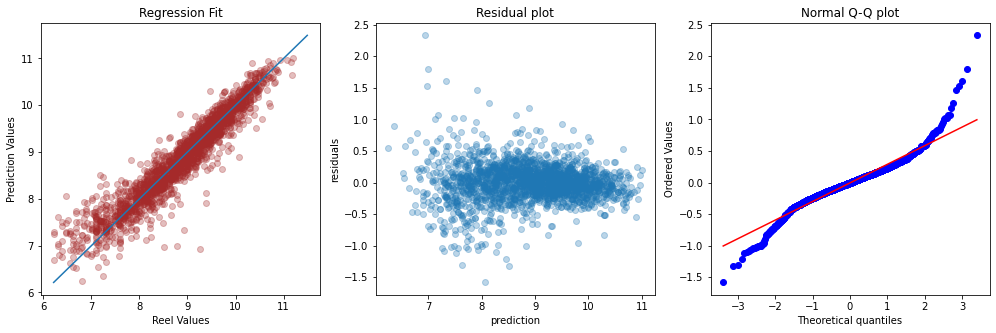

In [65]:
graphs_polyri(X,y);